# 0. Load Data & Module (필수)

In [1]:
#구글 코랩 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#데이터 경로 지정
PATH = '/content/drive/MyDrive/Colab Notebooks/data_in/'

In [3]:
#파이 캐럿 설치
!pip install pycaret

#라이브러리 설치
import pandas as pd
import numpy as np
from pycaret.classification import *
from time import time

from io import StringIO
import sys

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 

# 1. Data Analysis (필수)

In [4]:
# 데이터 불러오기
df = pd.read_csv(PATH + '/yrbs2021.csv')
df.head()

,sex,age_new,grade_new,bmi_category,smoking,drinking,stress,depression,suicide_tht,suicide_att,use_drug,white,black,asian,hispanic,other_race
0,0,12,12,2,1,1,1,1,1,0,0,0,0,0,1,0
1,0,14,9,1,0,0,1,0,0,0,0,1,0,0,0,0
2,0,14,9,4,0,0,2,0,1,0,0,0,0,0,1,0
3,0,14,9,2,0,0,0,0,0,0,0,0,1,0,0,0
4,0,14,9,2,0,0,2,0,0,0,1,0,0,0,0,1


In [5]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130128 entries, 0 to 130127
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   sex           130128 non-null  int64
 1   age_new       130128 non-null  int64
 2   grade_new     130128 non-null  int64
 3   bmi_category  130128 non-null  int64
 4   smoking       130128 non-null  int64
 5   drinking      130128 non-null  int64
 6   stress        130128 non-null  int64
 7   depression    130128 non-null  int64
 8   suicide_tht   130128 non-null  int64
 9   suicide_att   130128 non-null  int64
 10  use_drug      130128 non-null  int64
 11  white         130128 non-null  int64
 12  black         130128 non-null  int64
 13  asian         130128 non-null  int64
 14  hispanic      130128 non-null  int64
 15  other_race    130128 non-null  int64
dtypes: int64(16)
memory usage: 15.9 MB


In [6]:
# 상세 정보
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,130128.0,0.493568,0.499961,0.0,0.0,0.0,1.0,1.0
age_new,130128.0,15.635105,1.201855,12.0,15.0,16.0,17.0,18.0
grade_new,130128.0,10.359876,1.103687,9.0,9.0,10.0,11.0,12.0
bmi_category,130128.0,2.587276,1.027636,1.0,2.0,2.0,4.0,4.0
smoking,130128.0,0.174544,0.379578,0.0,0.0,0.0,0.0,1.0
drinking,130128.0,0.350401,0.829867,0.0,0.0,0.0,0.0,4.0
stress,130128.0,1.779094,1.182378,0.0,1.0,2.0,3.0,4.0
depression,130128.0,0.378835,0.485099,0.0,0.0,0.0,1.0,1.0
suicide_tht,130128.0,0.221559,0.415297,0.0,0.0,0.0,0.0,1.0
suicide_att,130128.0,0.102361,0.303123,0.0,0.0,0.0,0.0,1.0


> 범주형 데이터가 존재하나 수치형 범주 데이터임 -> 인코딩 필요 x

> 데이터의 범위가 매우 다양 -> 특성 스케일 맞추기 필요

In [7]:
# 데이터 수
df.shape

(130128, 16)

In [8]:
# 누락된 데이터 식별
df.isnull().sum()

sex             0
age_new         0
grade_new       0
bmi_category    0
smoking         0
drinking        0
stress          0
depression      0
suicide_tht     0
suicide_att     0
use_drug        0
white           0
black           0
asian           0
hispanic        0
other_race      0
dtype: int64

> 누락된 데이터가 없음 -> 누락 데이터 처리 필요 X

> feature 갯수가 많아 성능이 저하될 수 있음 -> feature selection 필요

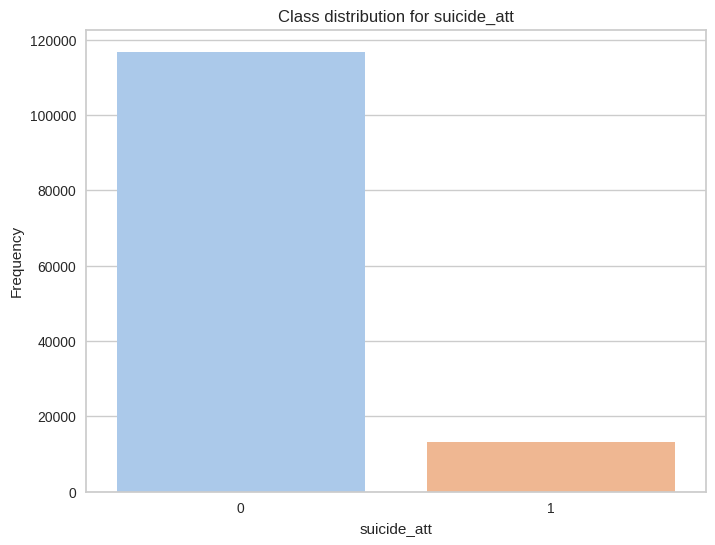

In [9]:
# label data인 suicide_att의 imbalance 여부 확인
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='suicide_att', palette="pastel")
plt.title('Class distribution for suicide_att')
plt.xlabel('suicide_att')
plt.ylabel('Frequency')
plt.show()

> 데이터에 Imbalance가 심한 관계로 모델 정확성에 영향을 미칠 수 있음. (imbalance 잡아줘야함)

In [10]:
X = df.drop(columns='suicide_att')  # 모든 행과 'suicide_att' 열을 제외한 모든 열 (features)
y = df['suicide_att']  # 'suicide_att' 열 (label)

# 2. Data Preprocessing (필수)

Total samples: 130128
Class 0 samples: 116808
Class 1 samples: 13320
Balanced samples: 233616
Class 0 samples after balancing: 116808
Class 1 samples after balancing: 116808


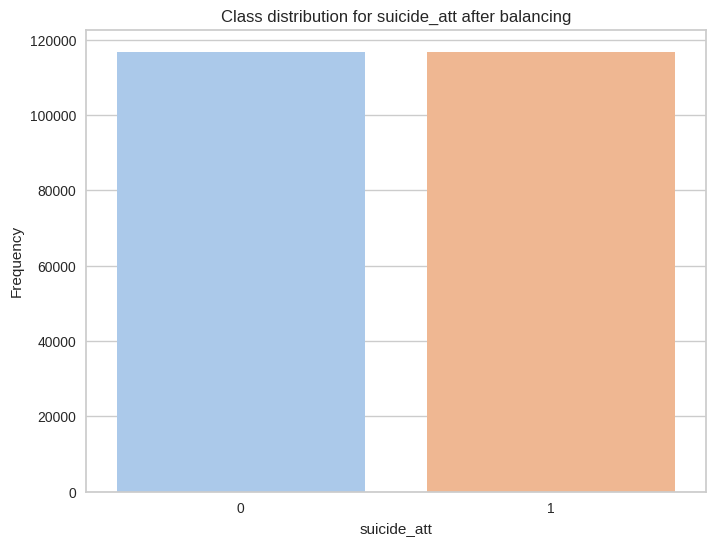

In [11]:
from imblearn.over_sampling import SMOTE

# 클래스 비율 확인
print("Total samples:", y.shape[0])
print("Class 0 samples:", (y == 0).sum())
print("Class 1 samples:", (y == 1).sum())

# SMOTE를 사용하여 클래스 불균형 처리
smote = SMOTE(random_state=123)
X_balanced, y_balanced = smote.fit_resample(X, y)

# 클래스 비율 확인
print("Balanced samples:", y_balanced.shape[0])
print("Class 0 samples after balancing:", (y_balanced == 0).sum())
print("Class 1 samples after balancing:", (y_balanced == 1).sum())

# 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x=y_balanced, palette="pastel")
plt.title('Class distribution for suicide_att after balancing')
plt.xlabel('suicide_att')
plt.ylabel('Frequency')
plt.show()

In [12]:
# 균형 잡힌 데이터셋을 train_test_split으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.20, stratify=y_balanced, random_state=1)


In [13]:
# 최종 데이터셋 저장 경로
OUT_PATH = '/content/drive/MyDrive/Colab Notebooks/data_out/'

X_train_final_data = "X_train_final_simple.npy"
X_test_final_data = "X_test_final_simple.npy"
y_train_data = "y_train_simple.npy"
y_test_data = "y_test_simple.npy"

# 최종 데이터셋 저장
np.save(open(OUT_PATH + X_train_final_data, 'wb'), X_train)
np.save(open(OUT_PATH + X_test_final_data, 'wb'), X_test)
np.save(open(OUT_PATH + y_train_data, 'wb'), y_train)  # y_train_res 사용
np.save(open(OUT_PATH + y_test_data, 'wb'), y_test)

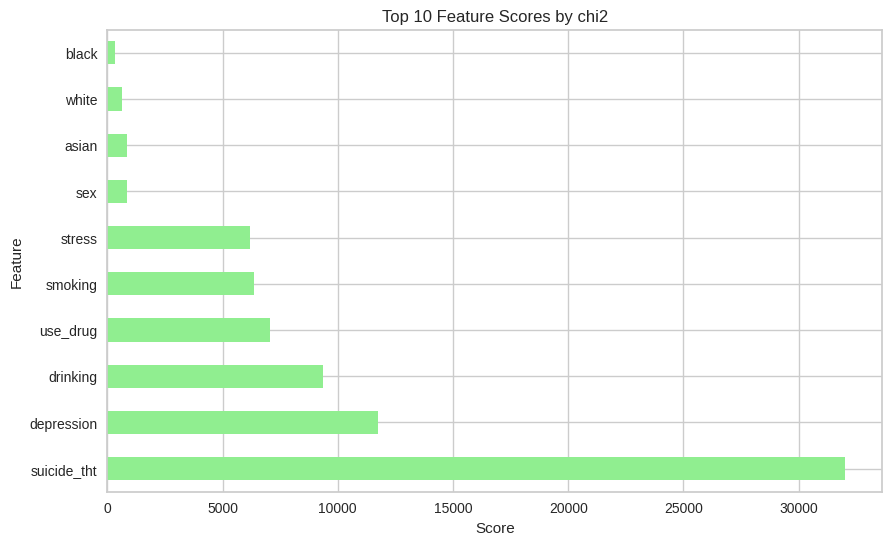

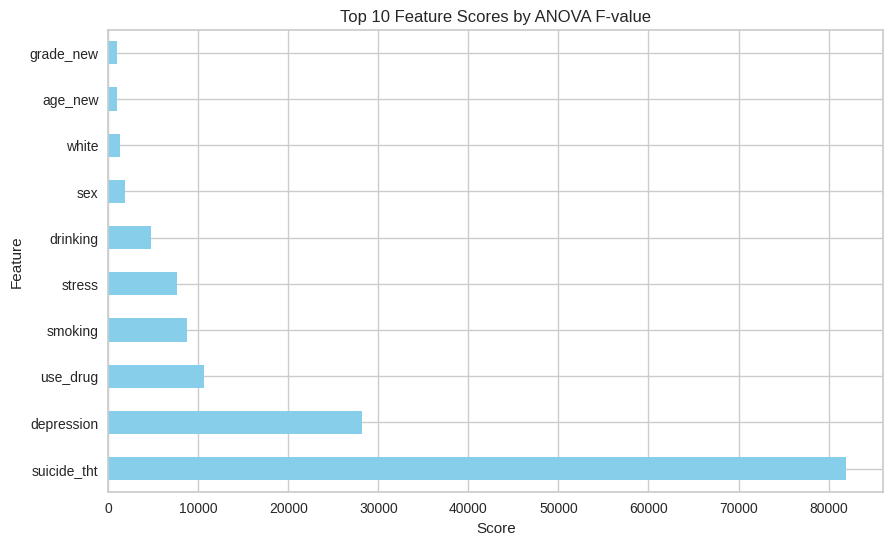

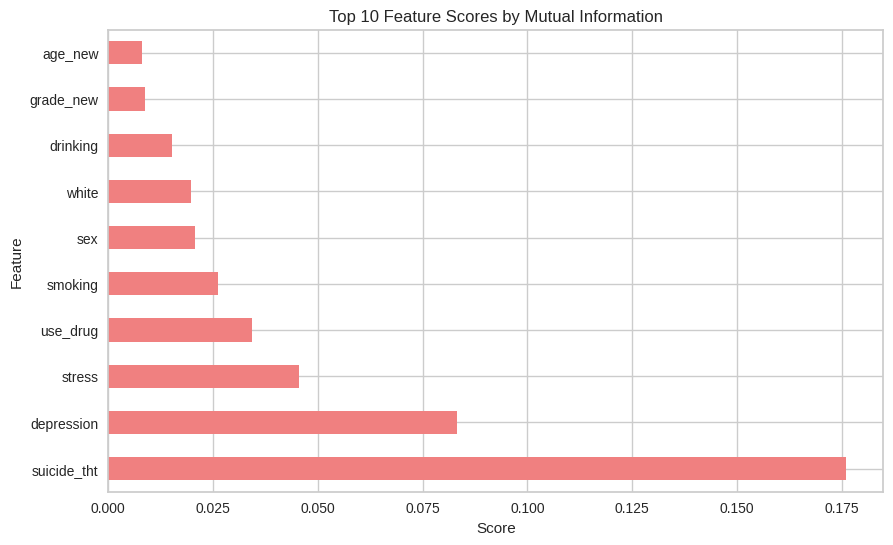

In [14]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

# Feature selection - SelectKBest with chi2
select_k_best_chi2 = SelectKBest(chi2, k='all')
select_k_best_chi2.fit(X_train, y_train)
chi2_scores = select_k_best_chi2.scores_

# Feature selection - SelectKBest with f_classif (ANOVA)
select_k_best_f_classif = SelectKBest(f_classif, k='all')
select_k_best_f_classif.fit(X_train, y_train)
f_classif_scores = select_k_best_f_classif.scores_

# Feature selection - SelectKBest with mutual_info_classif
select_k_best_mutual_info = SelectKBest(mutual_info_classif, k='all')
select_k_best_mutual_info.fit(X_train, y_train)
mutual_info_scores = select_k_best_mutual_info.scores_

feature_names = X.columns

# 시각화 - chi2
chi2_scores_series = pd.Series(chi2_scores, index=feature_names)
plt.figure(figsize=(10, 6))
chi2_scores_series.nlargest(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 Feature Scores by chi2')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

# 시각화 - f_classif
f_classif_scores_series = pd.Series(f_classif_scores, index=feature_names)
plt.figure(figsize=(10, 6))
f_classif_scores_series.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Scores by ANOVA F-value')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

# 시각화 - mutual_info_classif
mutual_info_scores_series = pd.Series(mutual_info_scores, index=feature_names)
plt.figure(figsize=(10, 6))
mutual_info_scores_series.nlargest(10).plot(kind='barh', color='lightcoral')
plt.title('Top 10 Feature Scores by Mutual Information')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

In [15]:
# 특성 스케일 맞추기
# 모든 Scaler 시도 후 가장 적합한 Scaler 찾기

# 1. MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

# 2. StandardScaler
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# 3. Robust Scaler
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
X_train_robust = rbs.fit_transform(X_train)
X_test_robust = rbs.fit_transform(X_test)

# 4. MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
X_train_maxabs = mas.fit_transform(X_train)
X_test_maxabs = mas.fit_transform(X_test)

In [16]:
# MinMaxScaler를 적용
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train to a NumPy array and reshape it to 2D
y_train_reshaped = y_train.to_numpy().reshape(-1, 1)

# Concatenate the arrays
df_scaled = pd.DataFrame(np.hstack((X_train_scaled, y_train_reshaped)), columns=list(X.columns) + ['suicide_att'])


# 3. Pycaret Screening

## 3.1. pycaret compare model

In [17]:
# PyCaret 환경 설정
exp_clf = setup(data=df_scaled, target='suicide_att', fix_imbalance=True, use_gpu=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,754
1,Target,suicide_att
2,Target type,Binary
3,Original data shape,"(186892, 16)"
4,Transformed data shape,"(186892, 16)"
5,Transformed train set shape,"(130824, 16)"
6,Transformed test set shape,"(56068, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [18]:
# 모든 모델 비교
best_model = compare_models(round = 3, sort = 'AUC', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.817,0.891,0.811,0.821,0.816,0.634,0.634,5.160
et,Extra Trees Classifier,0.817,0.890,0.798,0.829,0.813,0.633,0.634,5.174
dt,Decision Tree Classifier,0.810,0.871,0.795,0.820,0.807,0.620,0.621,4.265
xgboost,Extreme Gradient Boosting,0.789,0.853,0.752,0.812,0.781,0.577,0.579,4.460
knn,K Neighbors Classifier,0.786,0.849,0.805,0.776,0.790,0.572,0.572,9.015
lightgbm,Light Gradient Boosting Machine,0.782,0.842,0.731,0.814,0.771,0.564,0.567,4.551
gbc,Gradient Boosting Classifier,0.777,0.830,0.719,0.813,0.763,0.554,0.558,11.689
ada,Ada Boost Classifier,0.776,0.820,0.721,0.811,0.763,0.553,0.556,6.144
ridge,Ridge Classifier,0.777,0.818,0.719,0.812,0.763,0.553,0.557,4.119
lr,Logistic Regression,0.777,0.818,0.728,0.807,0.765,0.554,0.556,4.331


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [19]:
best_model

# 모델 저장
# save_model(best_model, OUT_PATH + 'models/best_model')


[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=754, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_sc

## 3.2. pycaret create model

In [20]:
model_rf = create_model('rf', fold=5)
print(model_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8156,0.8886,0.8091,0.8197,0.8144,0.6311,0.6312
1,0.8149,0.8889,0.8083,0.8191,0.8137,0.6298,0.6299
2,0.8132,0.8853,0.8047,0.8186,0.8116,0.6264,0.6265
3,0.8153,0.8900,0.8116,0.8176,0.8146,0.6306,0.6306
4,0.8134,0.8874,0.8070,0.8174,0.8122,0.6267,0.6268
Mean,0.8145,0.8880,0.8081,0.8185,0.8133,0.6289,0.6290
Std,0.0010,0.0016,0.0023,0.0009,0.0012,0.0020,0.0019


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=754, verbose=0,
                       warm_start=False)


In [21]:
model_et = create_model('et', fold=5)
print(model_et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8131,0.8875,0.7925,0.8266,0.8092,0.6262,0.6268
1,0.8143,0.8878,0.7945,0.8272,0.8105,0.6285,0.6290
2,0.8112,0.8835,0.7887,0.8258,0.8068,0.6223,0.6229
3,0.8159,0.8884,0.8011,0.8255,0.8131,0.6317,0.6320
4,0.8124,0.8842,0.7928,0.8252,0.8087,0.6248,0.6253
Mean,0.8134,0.8863,0.7939,0.8260,0.8097,0.6267,0.6272
Std,0.0016,0.0020,0.0041,0.0007,0.0021,0.0032,0.0031


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=754, verbose=0,
                     warm_start=False)


In [22]:
model_dt = create_model('dt', fold=5)
print(model_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8068,0.8681,0.7908,0.8170,0.8037,0.6137,0.6140
1,0.8082,0.8686,0.7901,0.8198,0.8047,0.6164,0.6168
2,0.8040,0.8639,0.7860,0.8154,0.8004,0.6080,0.6084
3,0.8093,0.8672,0.7983,0.8163,0.8072,0.6187,0.6188
4,0.8056,0.8639,0.7910,0.8147,0.8027,0.6111,0.6114
Mean,0.8068,0.8663,0.7912,0.8166,0.8037,0.6136,0.6139
Std,0.0019,0.0020,0.0040,0.0018,0.0022,0.0038,0.0037


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=754, splitter='best')


In [23]:
model_xgb = create_model('xgboost', fold=5)
print(model_xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7898,0.8552,0.7519,0.8135,0.7815,0.5795,0.5812
1,0.7885,0.8531,0.7522,0.8112,0.7806,0.5771,0.5786
2,0.7876,0.8513,0.7502,0.8109,0.7794,0.5752,0.5769
3,0.7898,0.8543,0.7557,0.8110,0.7824,0.5796,0.5809
4,0.7869,0.8507,0.7503,0.8096,0.7788,0.5738,0.5754
Mean,0.7885,0.8529,0.7521,0.8112,0.7805,0.5771,0.5786
Std,0.0011,0.0017,0.0020,0.0013,0.0013,0.0023,0.0023


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)


In [24]:
model_knn = create_model('knn', fold=5)
print(model_knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7847,0.8459,0.7926,0.7802,0.7864,0.5693,0.5694
1,0.7844,0.8490,0.8088,0.7712,0.7895,0.5688,0.5695
2,0.7821,0.8436,0.7948,0.7751,0.7848,0.5642,0.5644
3,0.7865,0.8516,0.8094,0.7739,0.7912,0.5729,0.5735
4,0.7777,0.8437,0.7912,0.7704,0.7807,0.5554,0.5556
Mean,0.7831,0.8468,0.7993,0.7742,0.7865,0.5661,0.5665
Std,0.0030,0.0031,0.0080,0.0035,0.0037,0.0060,0.0062


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


## 3.3. pycaret tuning

In [25]:
rf_model_tuned = tune_model(model_rf, verbose=True, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7770,0.8287,0.7167,0.8151,0.7627,0.5541,0.5581
1,0.7767,0.8275,0.7151,0.8157,0.7621,0.5535,0.5577
2,0.7758,0.8244,0.7102,0.8174,0.7601,0.5516,0.5564
3,0.7767,0.8285,0.7170,0.8142,0.7625,0.5534,0.5574
4,0.7762,0.8240,0.7105,0.8179,0.7605,0.5524,0.5572
Mean,0.7765,0.8266,0.7139,0.8161,0.7616,0.5530,0.5574
Std,0.0004,0.0020,0.0030,0.0014,0.0011,0.0009,0.0006


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [27]:
dt_model_tuned = tune_model(model_dt, verbose=True, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7799,0.8256,0.7267,0.8133,0.7675,0.5598,0.5630
1,0.7768,0.8282,0.7160,0.8152,0.7624,0.5537,0.5578
2,0.7752,0.8252,0.7209,0.8086,0.7623,0.5503,0.5536
3,0.7778,0.8265,0.7221,0.8126,0.7646,0.5555,0.5590
4,0.7756,0.8240,0.7120,0.8157,0.7604,0.5512,0.5557
Mean,0.7771,0.8259,0.7195,0.8131,0.7634,0.5541,0.5578
Std,0.0017,0.0014,0.0051,0.0025,0.0025,0.0034,0.0032


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [29]:
et_model_tuned = tune_model(model_et, verbose=True, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7768,0.8261,0.7168,0.8146,0.7626,0.5536,0.5576
1,0.7760,0.8258,0.7151,0.8142,0.7615,0.5519,0.5561
2,0.7755,0.8237,0.7114,0.8160,0.7601,0.5509,0.5555
3,0.7760,0.8263,0.7180,0.8123,0.7622,0.5521,0.5558
4,0.7749,0.8214,0.7114,0.8150,0.7596,0.5498,0.5543
Mean,0.7758,0.8247,0.7145,0.8144,0.7612,0.5517,0.5559
Std,0.0006,0.0019,0.0027,0.0012,0.0012,0.0013,0.0011


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [28]:
xgb_model_tuned = tune_model(model_xgb, verbose=True, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6367,0.8546,0.9882,0.5802,0.7312,0.2733,0.3844
1,0.6298,0.8529,0.9885,0.5756,0.7275,0.2595,0.3725
2,0.6343,0.8518,0.9882,0.5786,0.7299,0.2687,0.3803
3,0.6328,0.8551,0.9898,0.5775,0.7294,0.2657,0.3794
4,0.6300,0.8521,0.9893,0.5757,0.7278,0.2601,0.3739
Mean,0.6327,0.8533,0.9888,0.5775,0.7292,0.2654,0.3781
Std,0.0026,0.0013,0.0006,0.0018,0.0014,0.0052,0.0043


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [30]:
knn_model_tuned = tune_model(model_knn, verbose=True, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8048,0.8784,0.7984,0.8087,0.8035,0.6096,0.6096
1,0.8080,0.8797,0.8018,0.8119,0.8068,0.6161,0.6161
2,0.8037,0.8760,0.7886,0.8131,0.8007,0.6073,0.6076
3,0.8088,0.8808,0.8037,0.8120,0.8078,0.6176,0.6176
4,0.8042,0.8754,0.7906,0.8128,0.8015,0.6085,0.6087
Mean,0.8059,0.8781,0.7966,0.8117,0.8041,0.6118,0.6119
Std,0.0021,0.0021,0.0060,0.0016,0.0028,0.0042,0.0041


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [31]:
xgb_model_tuned.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.9,
 'device': 'gpu',
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.4,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': 4,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 150,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 754,
 'reg_alpha': 0.01,
 'reg_lambda': 0.2,
 'sampling_method': None,
 'scale_pos_weight': 24.1,
 'subsample': 0.2,
 'tree_method': 'hist',
 'validate_parameters': None,
 'verbosity': 0}

XGBClassifier(
    objective='binary:logistic', base_score=None, booster='gbtree', callbacks=None,
    colsample_bylevel=None, colsample_bynode=None, colsample_bytree=0.9, device=None,
    early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None,
    gamma=None, grow_policy=None, importance_type=None, interaction_constraints=None,
    learning_rate=0.1, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
    max_delta_step=None, max_depth=10, max_leaves=None, min_child_weight=1, missing=np.nan,
    monotone_constraints=None, multi_strategy=None, n_estimators=120, n_jobs=None,
    num_parallel_tree=None, random_state=None, reg_alpha=0.4, reg_lambda=0.3,
    sampling_method=None, scale_pos_weight=24.0, subsample=0.7, tree_method=None,
    validate_parameters=None, verbosity=None
)

In [32]:
knn_model_tuned

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=36, p=2,
                     weights='distance')

## 3.4. pycaret performance figure

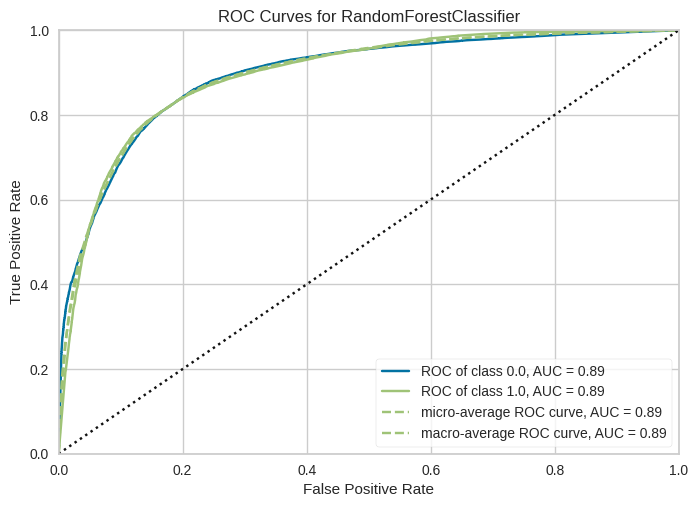

In [33]:
plot_model(rf_model_tuned,plot='auc')

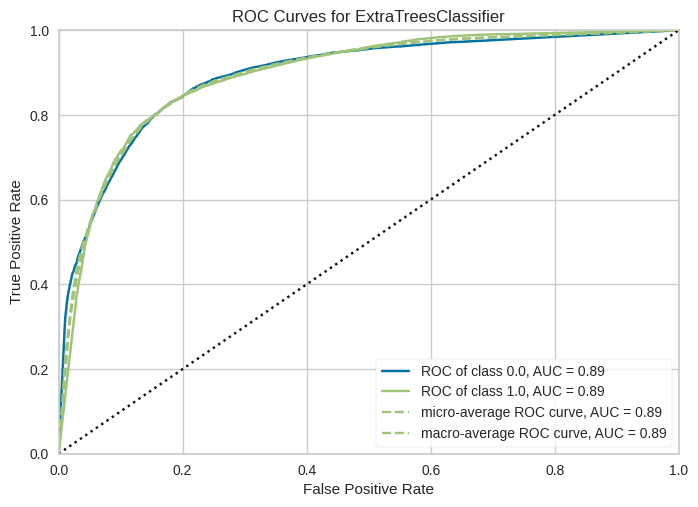

In [34]:
plot_model(et_model_tuned,plot='auc')

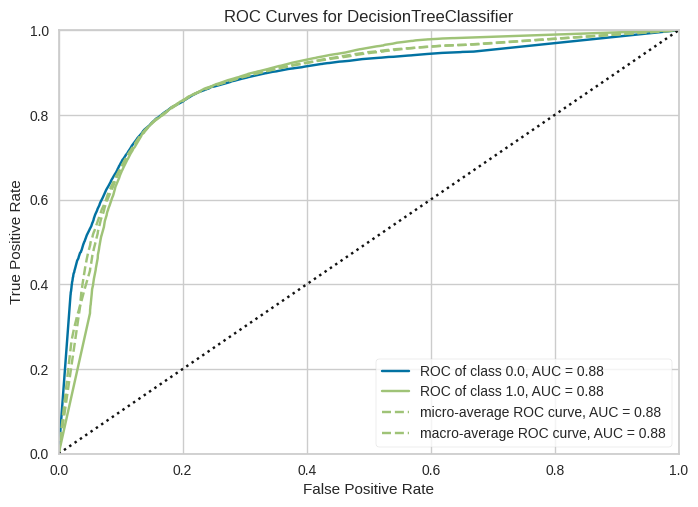

In [35]:
plot_model(dt_model_tuned,plot='auc')

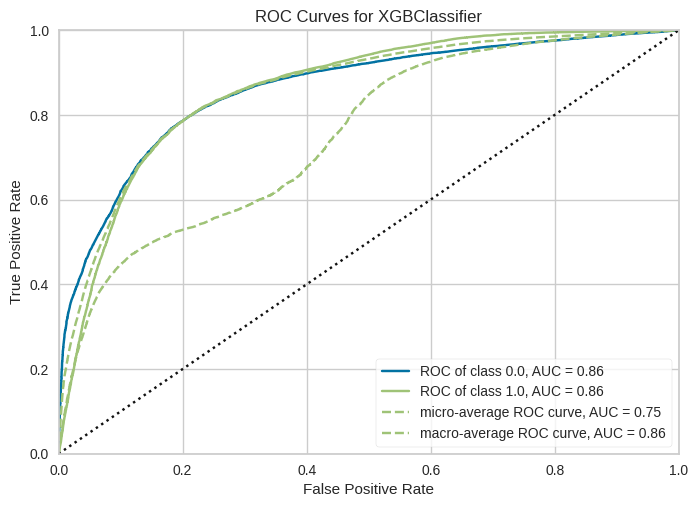

In [36]:
plot_model(xgb_model_tuned,plot='auc')

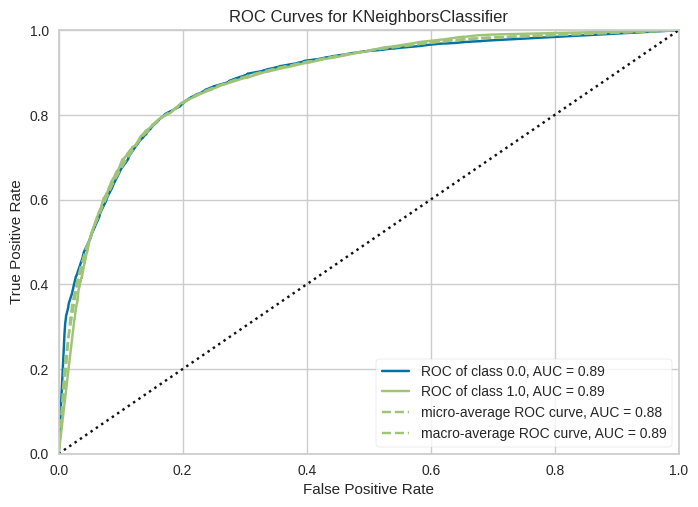

In [37]:
plot_model(knn_model_tuned,plot='auc')

# 3. Sci-kitlearn modeling (필수)

In [38]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib.colors import ListedColormap

AUC: 0.8972
Accuracy: 0.821
Recall: 0.810
Precision: 0.828
F1 Score: 0.819
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     23362
           1       0.83      0.81      0.82     23362

    accuracy                           0.82     46724
   macro avg       0.82      0.82      0.82     46724
weighted avg       0.82      0.82      0.82     46724



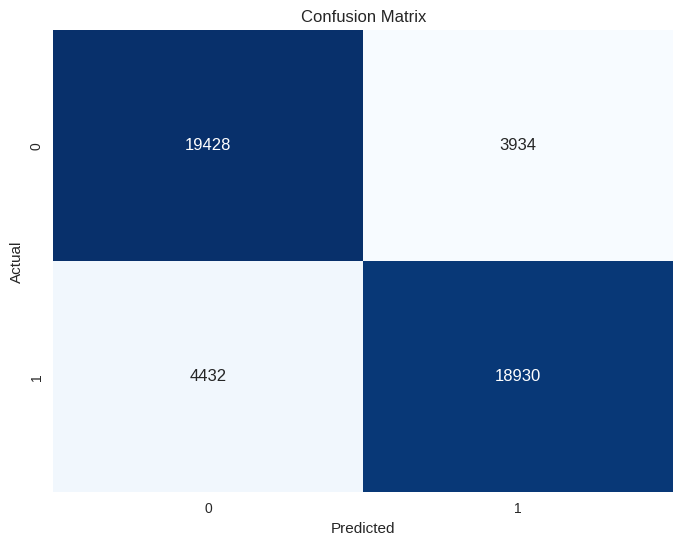

In [39]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier 생성 및 하이퍼파라미터 설정
rf_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=1093, verbose=0,
                       warm_start=False)
# 모델 학습
rf_model.fit(X_train_scaled, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# 성능 평가
accuracy = accuracy_score(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_pred_prob_rf)
recall = recall_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# 결과 출력
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")

# 분류 보고서 출력
report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(report)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC: 0.897
Accuracy: 0.822
Recall: 0.802
Precision: 0.835
F1 Score: 0.818
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83     23362
           1       0.83      0.80      0.82     23362

    accuracy                           0.82     46724
   macro avg       0.82      0.82      0.82     46724
weighted avg       0.82      0.82      0.82     46724



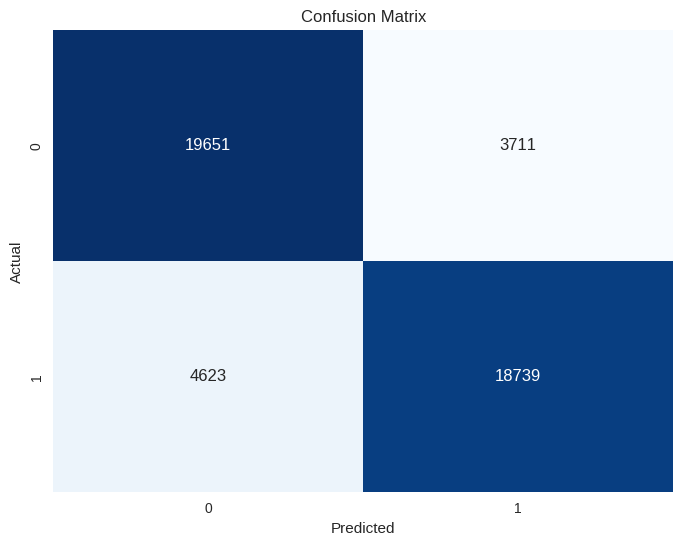

In [40]:
# Extra Tree Classifier
from sklearn.ensemble  import ExtraTreesClassifier

# Extra Trees Classifier 생성 및 하이퍼파라미터 설정
et_model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=7563, verbose=0,
                      warm_start=False)

# 모델 학습
et_model.fit(X_train_scaled, y_train)

# 예측
y_pred_et = et_model.predict(X_test_scaled)
y_pred_prob_et = et_model.predict_proba(X_test_scaled)[:, 1]

# 성능 평가
accuracy = accuracy_score(y_test, y_pred_et)
auc = roc_auc_score(y_test, y_pred_prob_et)
recall = recall_score(y_test, y_pred_et)
precision = precision_score(y_test, y_pred_et)
f1 = f1_score(y_test, y_pred_et)

# 결과 출력
print(f"AUC: {auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")

# 분류 보고서 출력
report = classification_report(y_test, y_pred_et)
print("Classification Report:")
print(report)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_et), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC: 0.882
Accuracy: 0.816
Recall: 0.801
Precision: 0.826
F1 Score: 0.813
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     23362
           1       0.83      0.80      0.81     23362

    accuracy                           0.82     46724
   macro avg       0.82      0.82      0.82     46724
weighted avg       0.82      0.82      0.82     46724



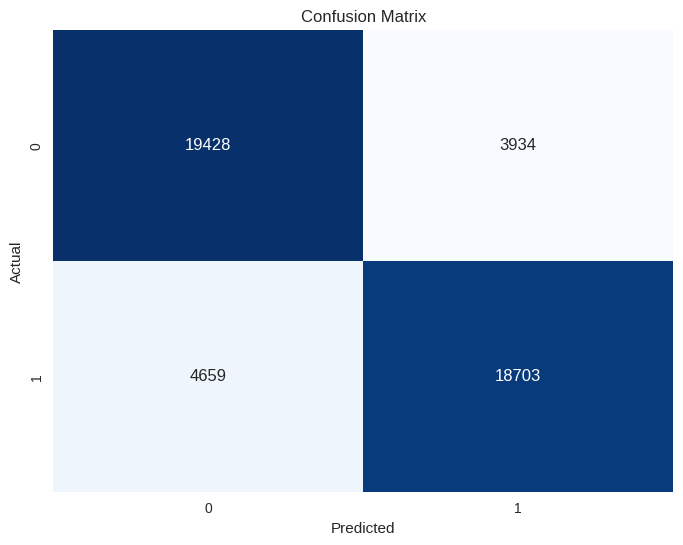

In [41]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier 생성 및 하이퍼파라미터 설정
dt_model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, random_state=7563, splitter='best')

# 모델 학습
dt_model.fit(X_train_scaled, y_train)

# 예측
y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# 성능 평가
accuracy = accuracy_score(y_test, y_pred_dt)
auc = roc_auc_score(y_test, y_pred_prob_dt)
recall = recall_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

# 결과 출력
print(f"AUC: {auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")

# 분류 보고서 출력
report = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(report)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC: 0.842
Accuracy: 0.780
Recall: 0.729
Precision: 0.812
F1 Score: 0.769
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     23362
           1       0.81      0.73      0.77     23362

    accuracy                           0.78     46724
   macro avg       0.78      0.78      0.78     46724
weighted avg       0.78      0.78      0.78     46724



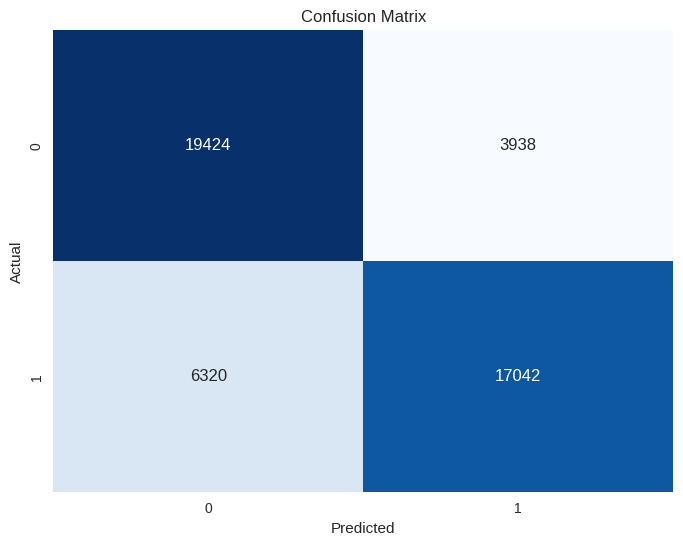

In [42]:
# Extreme Gradient Boosting Classifier
from xgboost import XGBClassifier

# XGBClassifier 생성 및 하이퍼파라미터 설정
xgb_model = XGBClassifier(learning_rate=0.1, objective='binary:logistic', n_estimators=100, booster='gbtree')

# 모델 학습
xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# 성능 평가
accuracy = accuracy_score(y_test, y_pred_xgb)
auc = roc_auc_score(y_test, y_pred_prob_xgb)
recall = recall_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

# 결과 출력
print(f"AUC: {auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")

# 분류 보고서 출력
report = classification_report(y_test, y_pred_xgb)
print("Classification Report:")
print(report)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


AUC: 0.855
Accuracy: 0.793
Recall: 0.801
Precision: 0.788
F1 Score: 0.795
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     23362
           1       0.79      0.80      0.79     23362

    accuracy                           0.79     46724
   macro avg       0.79      0.79      0.79     46724
weighted avg       0.79      0.79      0.79     46724



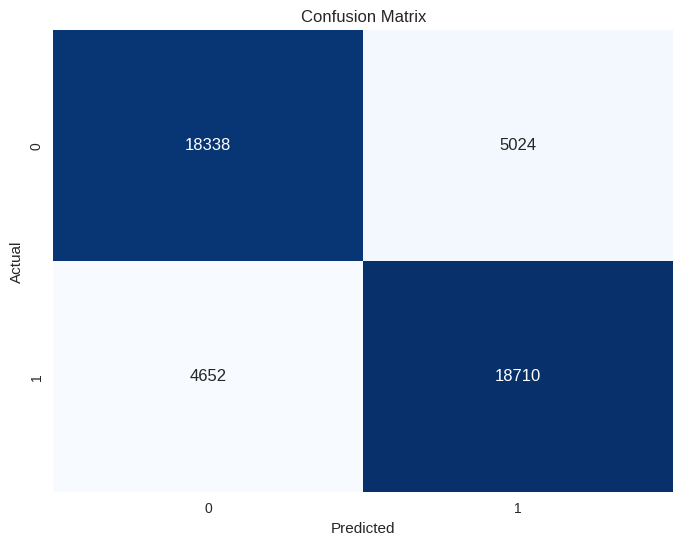

In [43]:
# K-Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# K-Neighbors Classifier 생성 및 하이퍼파라미터 설정
knn_model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform')

# 모델 학습
knn_model.fit(X_train_scaled, y_train)

# 예측
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# 성능 평가
accuracy = accuracy_score(y_test, y_pred_knn)
auc = roc_auc_score(y_test, y_pred_prob_knn)
recall = recall_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

# 결과 출력
print(f"AUC: {auc:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")

# 분류 보고서 출력
report = classification_report(y_test, y_pred_knn)
print("Classification Report:")
print(report)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# 4. Re-modeling

## 4.1. scaler

In [44]:
# 파이프라인 만들기
from sklearn.pipeline import make_pipeline

# rf
pipeline_rf_norm = make_pipeline(MinMaxScaler(), rf_model)
pipeline_rf_std = make_pipeline(StandardScaler(), rf_model)
pipeline_rf_robust = make_pipeline(RobustScaler(), rf_model)
pipeline_rf_maxabs = make_pipeline(MaxAbsScaler(), rf_model)

# et
pipeline_et_norm = make_pipeline(MinMaxScaler(), et_model)
pipeline_et_std = make_pipeline(StandardScaler(), et_model)
pipeline_et_robust = make_pipeline(RobustScaler(), et_model)
pipeline_et_maxabs = make_pipeline(MaxAbsScaler(), et_model)

# dt
pipeline_dt_norm = make_pipeline(MinMaxScaler(), dt_model)
pipeline_dt_std = make_pipeline(StandardScaler(), dt_model)
pipeline_dt_robust = make_pipeline(RobustScaler(), dt_model)
pipeline_dt_maxabs = make_pipeline(MaxAbsScaler(), dt_model)

# xgboost
pipeline_xgboost_norm = make_pipeline(MinMaxScaler(), xgb_model)
pipeline_xgboost_std = make_pipeline(StandardScaler(), xgb_model)
pipeline_xgboost_robust = make_pipeline(RobustScaler(), xgb_model)
pipeline_xgboost_maxabs = make_pipeline(MaxAbsScaler(), xgb_model)


# knn
pipeline_knn_norm = make_pipeline(MinMaxScaler(), knn_model)
pipeline_knn_std = make_pipeline(StandardScaler(), knn_model)
pipeline_knn_robust = make_pipeline(RobustScaler(), knn_model)
pipeline_knn_maxabs = make_pipeline(MaxAbsScaler(), knn_model)




In [45]:
rf_list = [pipeline_rf_norm, pipeline_rf_std, pipeline_rf_robust, pipeline_rf_maxabs]
et_list = [pipeline_et_norm, pipeline_et_std, pipeline_et_robust, pipeline_et_maxabs]
dt_list = [pipeline_dt_norm, pipeline_dt_std, pipeline_dt_robust, pipeline_dt_maxabs]
xgboost_list = [pipeline_xgboost_norm, pipeline_xgboost_std, pipeline_xgboost_robust, pipeline_xgboost_maxabs]
knn_list = [pipeline_knn_norm, pipeline_knn_std, pipeline_knn_robust, pipeline_knn_maxabs]

scaler_list = ['MinMaxScaler', 'StandardScaler', 'RobustScaler', 'MaxAbsScaler']

print('Random Forest')
for i in range(4):
  rf_list[i].fit(X_train, y_train)
  y_pred = rf_list[i].predict(X_test)
  print(scaler_list[i], '정확도: %.3f' % rf_list[i].score(X_test, y_test))
print()

print('Extra Trees')
for i in range(4):
  et_list[i].fit(X_train, y_train)
  y_pred = et_list[i].predict(X_test)
  print(scaler_list[i], '정확도: %.3f' % et_list[i].score(X_test, y_test))
print()

print('Decision Trees')
for i in range(4):
  dt_list[i].fit(X_train, y_train)
  y_pred = dt_list[i].predict(X_test)
  print(scaler_list[i], '정확도: %.3f' % dt_list[i].score(X_test, y_test))
print()

print('XGBoost')
for i in range(4):
  xgboost_list[i].fit(X_train, y_train)
  y_pred = xgboost_list[i].predict(X_test)
  print(scaler_list[i], '정확도: %.3f' % xgboost_list[i].score(X_test, y_test))
print()

print('KNeighbor')
for i in range(4):
  knn_list[i].fit(X_train, y_train)
  y_pred = knn_list[i].predict(X_test)
  print(scaler_list[i], '정확도: %.3f' % knn_list[i].score(X_test, y_test))
print()


Random Forest
MinMaxScaler 정확도: 0.821
StandardScaler 정확도: 0.821
RobustScaler 정확도: 0.821
MaxAbsScaler 정확도: 0.821

Extra Trees
MinMaxScaler 정확도: 0.822
StandardScaler 정확도: 0.822
RobustScaler 정확도: 0.822
MaxAbsScaler 정확도: 0.822

Decision Trees
MinMaxScaler 정확도: 0.816
StandardScaler 정확도: 0.816
RobustScaler 정확도: 0.816
MaxAbsScaler 정확도: 0.816

XGBoost
MinMaxScaler 정확도: 0.780
StandardScaler 정확도: 0.780
RobustScaler 정확도: 0.780
MaxAbsScaler 정확도: 0.780

KNeighbor
MinMaxScaler 정확도: 0.793
StandardScaler 정확도: 0.792
RobustScaler 정확도: 0.792
MaxAbsScaler 정확도: 0.792



* RF: 차이X -> MinMax Scaler
* ET: 차이X -> MinMax Scaler
* DT: 차이X -> MinMax Scaler
* XGB: 차이X -> MinMax Scaler
* KNN: MinMax Scaler

> 모든 모델에 대해 MinMax Scaler 적용 -> 기존 모델과 동일

## 4.2. feature extraction

In [46]:
# 특성 선택 - 순차 후진 선택 알고리즘 (Sequential Backward Selection, SBS)
from sklearn.base import clone
from itertools import combinations
from sklearn.feature_selection import SelectFromModel

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X_train, X_test, y_train, y_test):

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


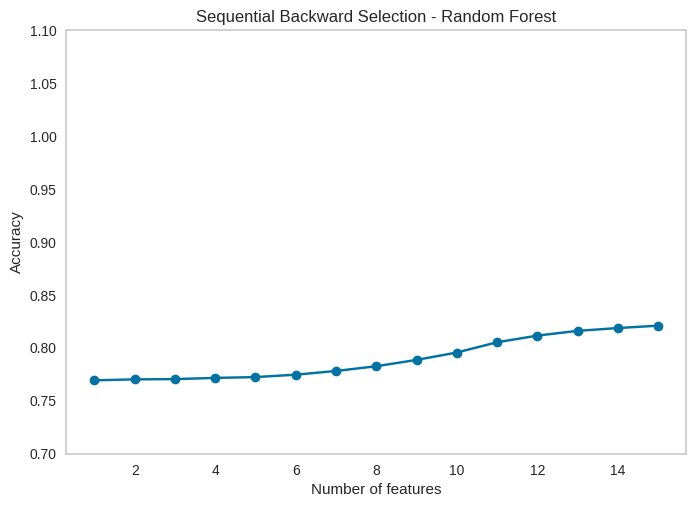

In [47]:
# Random Forest SBS 적용
rf_feat = SBS(rf_model, k_features=1)
rf_feat.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# 선택한 특성의 성능을 출력
rf_feat_num = [len(k) for k in rf_feat.subsets_]

# 성능을 그래프로 시각화
plt.figure()
plt.plot(rf_feat_num, rf_feat.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.title('Sequential Backward Selection - Random Forest')
plt.show()

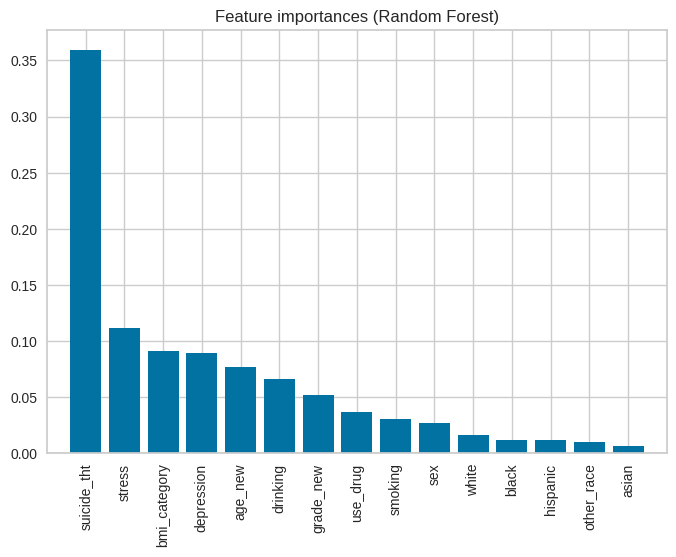

In [48]:
# 특성 선택
sfm_rf = SelectFromModel(rf_model, threshold=0)
sfm_rf.fit(X_train_scaled, y_train)
X_train_selected_rf = sfm_rf.transform(X_train_scaled)
X_test_selected_rf = sfm_rf.transform(X_test_scaled)
selected_indices_rf = sfm_rf.get_support(indices=True)
selected_feature_names_rf = X_train.columns[selected_indices_rf]

# 선택된 특성의 중요도만 시각화
importances_rf = rf_model.feature_importances_
selected_importances_rf = importances_rf[selected_indices_rf]
indices_rf = np.argsort(selected_importances_rf)[::-1]

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(len(selected_importances_rf)), selected_importances_rf[indices_rf], align="center")
plt.xticks(range(len(selected_importances_rf)), selected_feature_names_rf[indices_rf], rotation=90)
plt.xlim([-1, len(selected_importances_rf)])
plt.show()


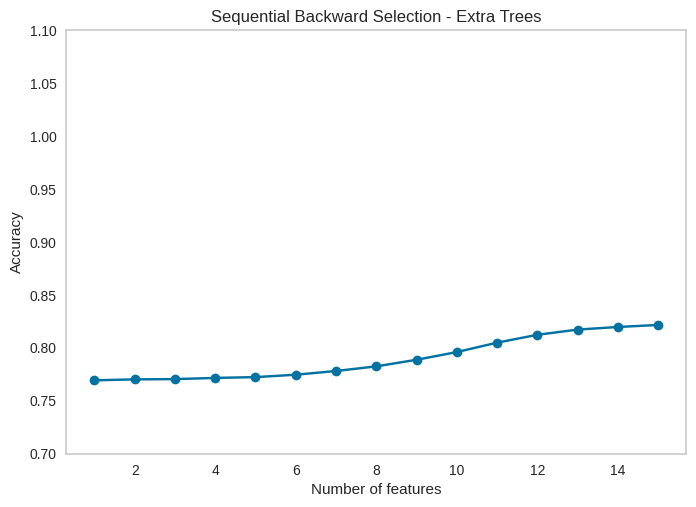

In [49]:
# Extra Trees SBS 적용
et_feat = SBS(et_model, k_features=1)
et_feat.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# 선택한 특성의 성능을 출력
et_feat_num = [len(k) for k in et_feat.subsets_]

# 성능을 그래프로 시각화
plt.figure()
plt.plot(et_feat_num, et_feat.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.title('Sequential Backward Selection - Extra Trees')
plt.show()


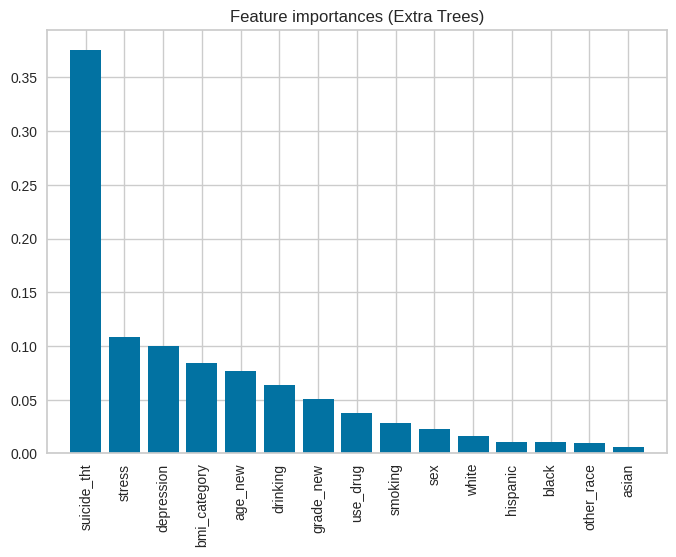

In [50]:
# 특성 선택
sfm_et = SelectFromModel(et_model, threshold=0)
sfm_et.fit(X_train_scaled, y_train)
X_train_selected_et = sfm_et.transform(X_train_scaled)
X_test_selected_et = sfm_et.transform(X_test_scaled)
selected_indices_et = sfm_et.get_support(indices=True)
selected_feature_names_et = X_train.columns[selected_indices_et]


# 선택된 특성의 중요도만 시각화
importances_et = et_model.feature_importances_
selected_importances_et = importances_et[selected_indices_et]
indices_et = np.argsort(selected_importances_et)[::-1]

plt.figure()
plt.title("Feature importances (Extra Trees)")
plt.bar(range(len(selected_importances_et)), selected_importances_et[indices_et], align="center")
plt.xticks(range(len(selected_importances_et)), selected_feature_names_et[indices_et], rotation=90)
plt.xlim([-1, len(selected_importances_et)])
plt.show()

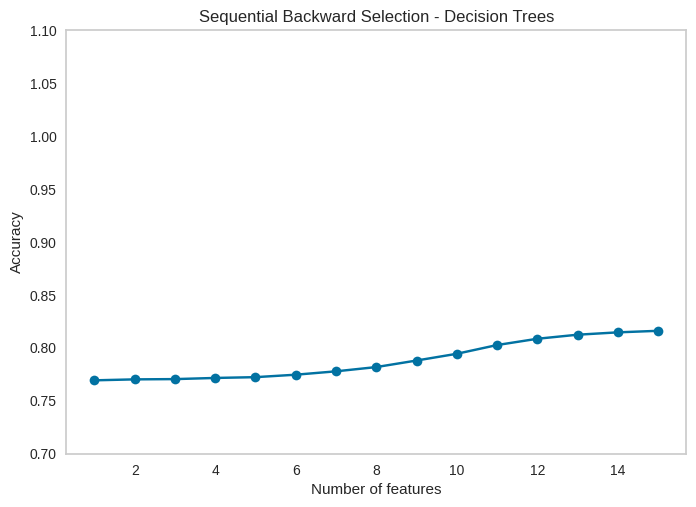

In [51]:
# Decision Trees SBS 적용
dt_feat = SBS(dt_model, k_features=1)
dt_feat.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# 선택한 특성의 성능을 출력
dt_feat_num = [len(k) for k in dt_feat.subsets_]

# 성능을 그래프로 시각화
plt.figure()
plt.plot(dt_feat_num, dt_feat.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.title('Sequential Backward Selection - Decision Trees')
plt.show()



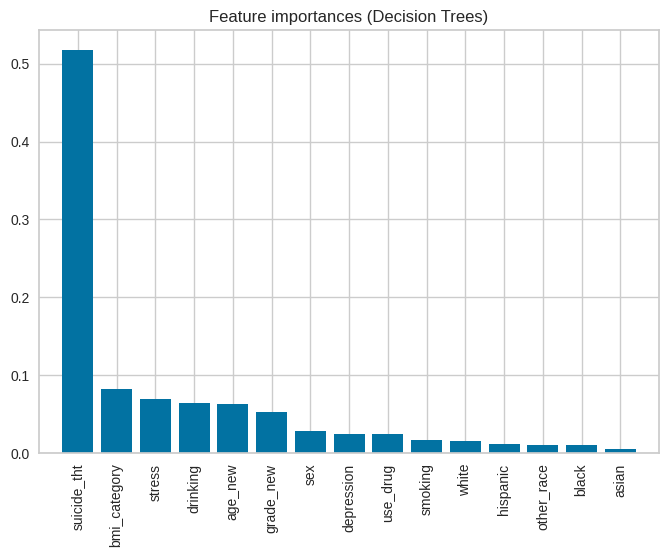

In [52]:
# 특성 선택
sfm_dt = SelectFromModel(dt_model, threshold=0)
sfm_dt.fit(X_train_scaled, y_train)
X_train_selected_dt = sfm_dt.transform(X_train_scaled)
X_test_selected_dt = sfm_dt.transform(X_test_scaled)
selected_indices_dt = sfm_dt.get_support(indices=True)
selected_feature_names_dt = X_train.columns[selected_indices_dt]

# 선택된 특성의 중요도만 시각화
importances_dt = dt_model.feature_importances_
selected_importances_dt = importances_dt[selected_indices_dt]
indices_dt = np.argsort(selected_importances_dt)[::-1]

plt.figure()
plt.title("Feature importances (Decision Trees)")
plt.bar(range(len(selected_importances_dt)), selected_importances_dt[indices_dt], align="center")
plt.xticks(range(len(selected_importances_dt)), selected_feature_names_dt[indices_dt], rotation=90)
plt.xlim([-1, len(selected_importances_dt)])
plt.show()

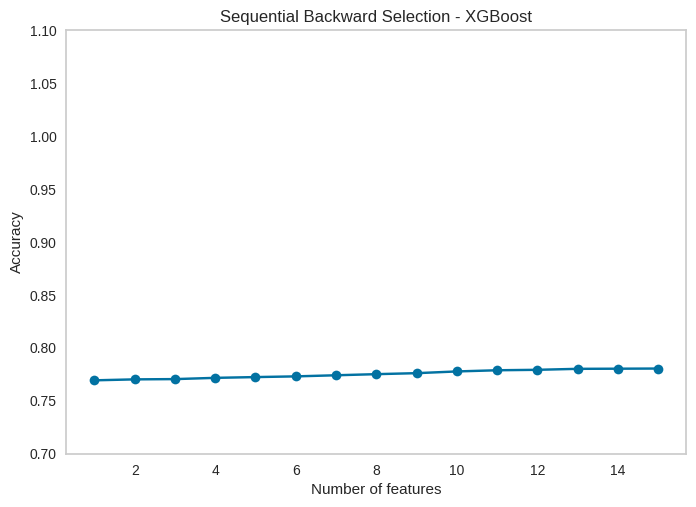

In [53]:
# XGBoost SBS 적용
xgb_feat = SBS(xgb_model, k_features=1)
xgb_feat.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# 선택한 특성의 성능을 출력
xgb_feat_num = [len(k) for k in xgb_feat.subsets_]

# 성능을 그래프로 시각화
plt.figure()
plt.plot(xgb_feat_num, xgb_feat.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.title('Sequential Backward Selection - XGBoost')
plt.show()


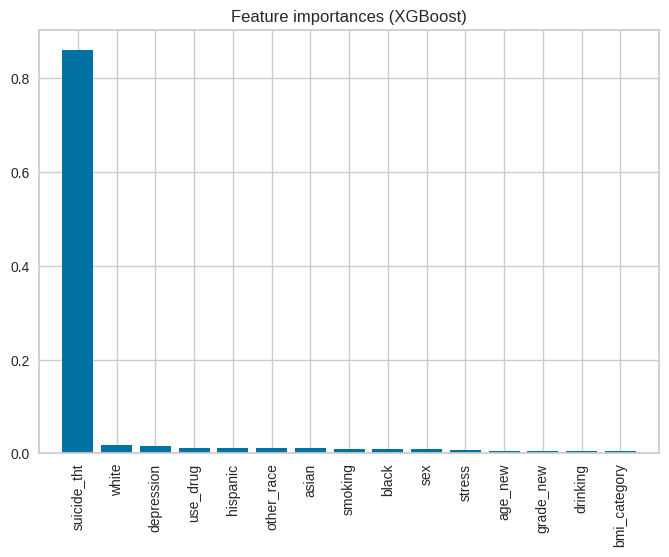

In [54]:
# 특성 선택
sfm_xgb = SelectFromModel(xgb_model, threshold=0)
sfm_xgb.fit(X_train_scaled, y_train)
X_train_selected_xgb = sfm_xgb.transform(X_train_scaled)
X_test_selected_xgb = sfm_xgb.transform(X_test_scaled)
selected_indices_xgb = sfm_xgb.get_support(indices=True)
selected_feature_names_xgb = X_train.columns[selected_indices_xgb]

# 선택된 특성의 중요도만 시각화
importances_xgb = xgb_model.feature_importances_
selected_importances_xgb = importances_xgb[selected_indices_xgb]
indices_xgb = np.argsort(selected_importances_xgb)[::-1]

plt.figure()
plt.title("Feature importances (XGBoost)")
plt.bar(range(len(selected_importances_xgb)), selected_importances_xgb[indices_xgb], align="center")
plt.xticks(range(len(selected_importances_xgb)), selected_feature_names_xgb[indices_xgb], rotation=90)
plt.xlim([-1, len(selected_importances_xgb)])
plt.show()

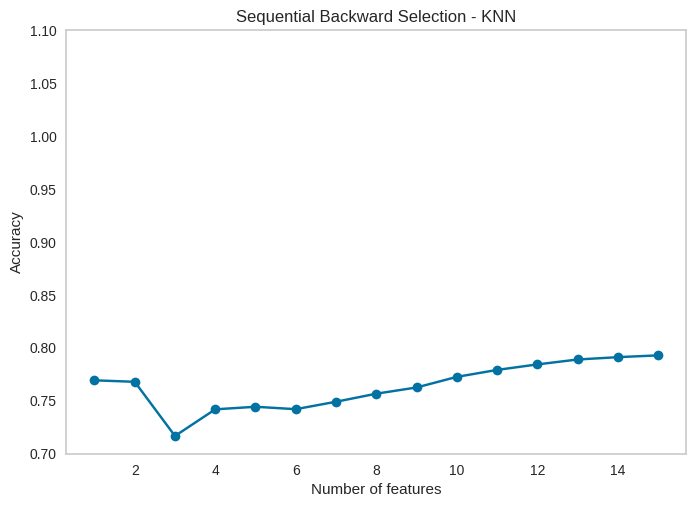

In [55]:
# KNN SBS 적용
knn_feat = SBS(knn_model, k_features=1)
knn_feat.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# 선택한 특성의 성능을 출력
knn_feat_num = [len(k) for k in knn_feat.subsets_]

# 성능을 그래프로 시각화
plt.figure()
plt.plot(knn_feat_num, knn_feat.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.title('Sequential Backward Selection - KNN')
plt.show()

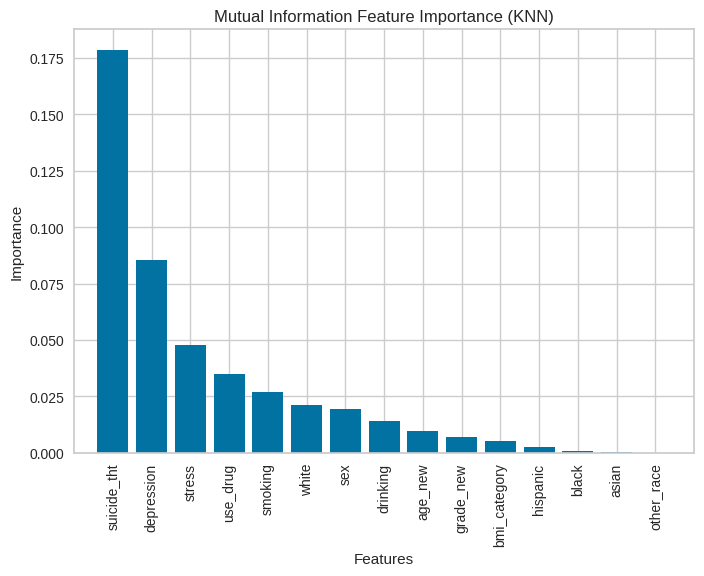

In [56]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# 특성 중요도 계산
mutual_info = mutual_info_classif(X_train_scaled, y_train)
mutual_info_series = pd.Series(mutual_info, index=X_train.columns)
mutual_info_series = mutual_info_series.sort_values(ascending=False)

# 상위 15개 특성 선택
top_features = mutual_info_series.head(15).index.tolist()

# 특성 선택 후 데이터 변환
X_train_selected_knn = X_train_scaled[:, X_train.columns.get_indexer(top_features)]
X_test_selected_knn = X_test_scaled[:, X_train.columns.get_indexer(top_features)]

# 특성 중요도 시각화
plt.figure()
plt.title("Mutual Information Feature Importance (KNN)")
plt.bar(range(len(top_features)), mutual_info_series.head(15), align="center")
plt.xticks(range(len(top_features)), top_features, rotation=90)
plt.xlim([-1, len(top_features)])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

* RF = 15
* ET = 15
* DT = 15
* XGB = 15
* KNN = 15

> 모든 모델에 대해 feature 15개를 모두 사용 -> 기존 모델과 동일

## 4.3. k-fold cross validation

In [57]:
# K겹 교차 검증
from sklearn.model_selection import cross_val_score

# Random Forest
r_kf_scores = cross_val_score(estimator=rf_model, X=X_train_scaled, y=y_train, cv = 10, n_jobs=1)
print('Random Forest CV 정확도 점수: %s' % r_kf_scores)
print('Random Forest CV 정확도: %.3f +/- %.3f' % (np.mean(r_kf_scores), np.std(r_kf_scores)))

# Extra Tree
e_kf_scores = cross_val_score(estimator=et_model, X=X_train_scaled, y=y_train, cv = 10, n_jobs=1)
print('Extra Tree CV 정확도 점수: %s' % e_kf_scores)
print('Extra Tree CV 정확도: %.3f +/- %.3f' % (np.mean(e_kf_scores), np.std(e_kf_scores)))

# Decision Tree
d_kf_scores = cross_val_score(estimator=dt_model, X=X_train_scaled, y=y_train, cv = 10, n_jobs=1)
print('Decision Tree CV 정확도 점수: %s' % d_kf_scores)
print('Decision Tree CV 정확도: %.3f +/- %.3f' % (np.mean(d_kf_scores), np.std(d_kf_scores)))

# XGBoost
x_kf_scores = cross_val_score(estimator=xgb_model, X=X_train_scaled, y=y_train, cv = 10, n_jobs=1)
print('XGBoost CV 정확도 점수: %s' % x_kf_scores)
print('XGboost CV 정확도: %.3f +/- %.3f' % (np.mean(x_kf_scores), np.std(x_kf_scores)))

# KNN
k_kf_scores = cross_val_score(estimator=knn_model, X=X_train_scaled, y=y_train, cv = 10, n_jobs=1)
print('KNN CV 정확도 점수: %s' % k_kf_scores)
print('KNN CV 정확도: %.3f +/- %.3f' % (np.mean(k_kf_scores), np.std(k_kf_scores)))



Random Forest CV 정확도 점수: [0.82696629 0.82054575 0.8238536  0.82497726 0.82417465 0.82283696
 0.83075606 0.81620204 0.82647547 0.82476323]
Random Forest CV 정확도: 0.824 +/- 0.004
Extra Tree CV 정확도 점수: [0.82718031 0.82134831 0.82412114 0.82470972 0.82503077 0.82305099
 0.82909733 0.81550645 0.82588689 0.82487024]
Extra Tree CV 정확도: 0.824 +/- 0.003
Decision Tree CV 정확도 점수: [0.82397004 0.81728197 0.81753973 0.82101771 0.81978704 0.81925197
 0.82294398 0.81069078 0.82149928 0.81775376]
Decision Tree CV 정확도: 0.819 +/- 0.004
XGBoost CV 정확도 점수: [0.78362761 0.77956126 0.78538178 0.78243887 0.78639842 0.78425812
 0.79051849 0.77649955 0.78682648 0.78045909]
XGboost CV 정확도: 0.784 +/- 0.004
KNN CV 정확도 점수: [0.79636169 0.7918138  0.79485259 0.79592274 0.79982878 0.79356841
 0.80020333 0.78580983 0.79972176 0.79356841]
KNN CV 정확도: 0.795 +/- 0.004


In [58]:
# K겹 교차 검증
from sklearn.model_selection import cross_val_score

# Random Forest
r_kf_scores = cross_val_score(estimator=rf_model, X=X_train_scaled, y=y_train, cv = 10, n_jobs=1, scoring='roc_auc')
print('Random Forest CV AUC 점수: %s' % r_kf_scores)
print('Random Forest CV AUC: %.3f +/- %.3f' % (np.mean(r_kf_scores), np.std(r_kf_scores)))

# Extra Tree
e_kf_scores = cross_val_score(estimator=et_model, X=X_train_scaled, y=y_train, cv = 10, n_jobs=1, scoring='roc_auc')
print('Extra Tree CV AUC 점수: %s' % e_kf_scores)
print('Extra Tree CV AUC: %.3f +/- %.3f' % (np.mean(e_kf_scores), np.std(e_kf_scores)))

# Decision Tree
d_kf_scores = cross_val_score(estimator=dt_model, X=X_train_scaled, y=y_train, cv = 10, n_jobs=1, scoring='roc_auc')
print('Decision Tree CV AUC 점수: %s' % d_kf_scores)
print('Decision Tree CV AUC: %.3f +/- %.3f' % (np.mean(d_kf_scores), np.std(d_kf_scores)))

# XGBoost
x_kf_scores = cross_val_score(estimator=xgb_model, X=X_train_scaled, y=y_train, cv = 10, n_jobs=1, scoring='roc_auc')
print('XGBoost CV AUC 점수: %s' % x_kf_scores)
print('XGboost CV AUC: %.3f +/- %.3f' % (np.mean(x_kf_scores), np.std(x_kf_scores)))

# KNN
k_kf_scores = cross_val_score(estimator=knn_model, X=X_train_scaled, y=y_train, cv = 10, n_jobs=1, scoring='roc_auc')
print('KNN CV AUC 점수: %s' % k_kf_scores)
print('KNN CV AUC: %.3f +/- %.3f' % (np.mean(k_kf_scores), np.std(k_kf_scores)))



Random Forest CV AUC 점수: [0.90194273 0.89764924 0.90013744 0.89906302 0.8992452  0.89957087
 0.90357639 0.89157287 0.90169401 0.89876733]
Random Forest CV AUC: 0.899 +/- 0.003
Extra Tree CV AUC 점수: [0.90120364 0.89692925 0.89941426 0.89859957 0.89816529 0.89852701
 0.90341677 0.89089447 0.90077113 0.8987378 ]
Extra Tree CV AUC: 0.899 +/- 0.003
Decision Tree CV AUC 점수: [0.88929513 0.88304615 0.88327466 0.88546927 0.88469345 0.88619521
 0.88667528 0.8773621  0.88687956 0.88115002]
Decision Tree CV AUC: 0.884 +/- 0.003
XGBoost CV AUC 점수: [0.84636596 0.84425877 0.84896456 0.84327928 0.84690148 0.84479278
 0.84953228 0.83662657 0.84859151 0.84074764]
XGboost CV AUC: 0.845 +/- 0.004
KNN CV AUC 점수: [0.8598316  0.85525277 0.86052518 0.85821215 0.86018699 0.86038264
 0.86224882 0.84762645 0.86020197 0.85646958]
KNN CV AUC: 0.858 +/- 0.004


## 4.4. learning curve and validatoin curve

In [59]:
# 모델과 데이터 리스트
model_name_list = ["Random Forest", "Extra Trees", "Decision Tree", "XGBoost", "KNN"]

In [60]:
# 학습 곡선과 검증 곡선
from sklearn.model_selection import learning_curve

# 학습 곡선 함수 정의
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.title(model_name)
    plt.grid()
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.7, 1.0])
    plt.tight_layout()
    plt.show()


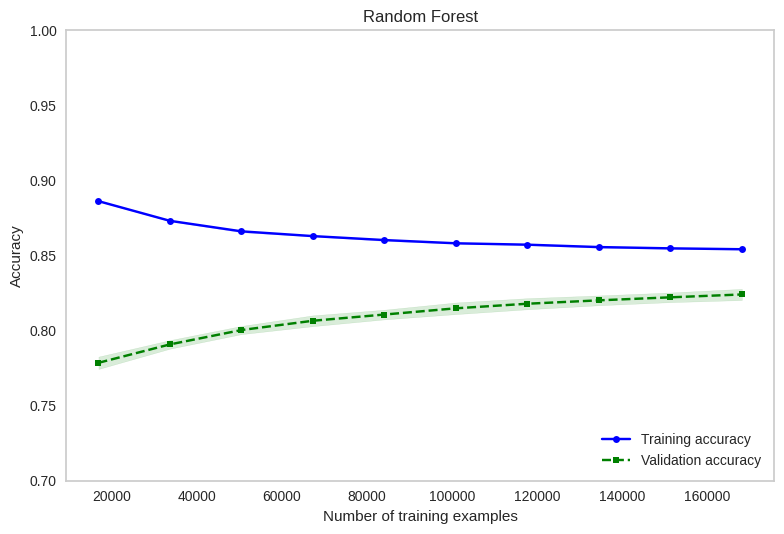

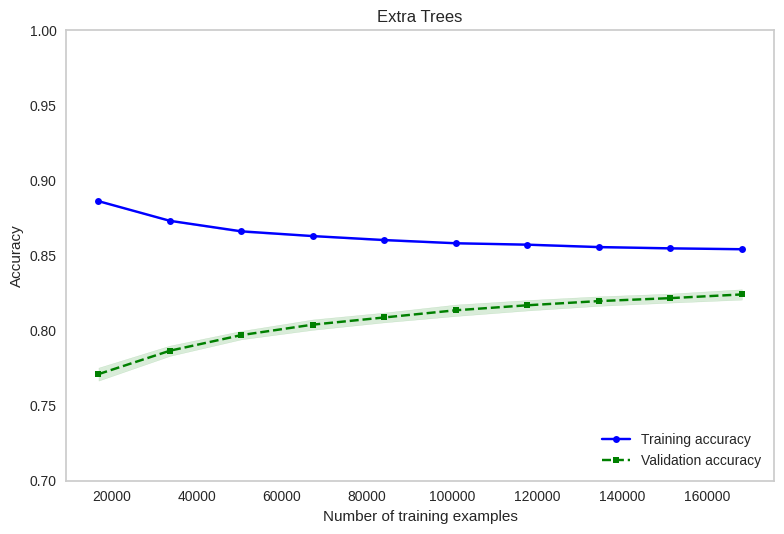

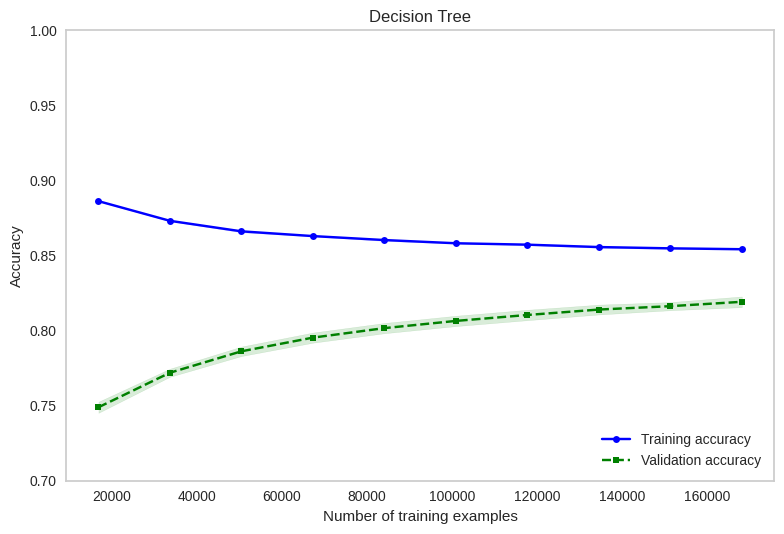

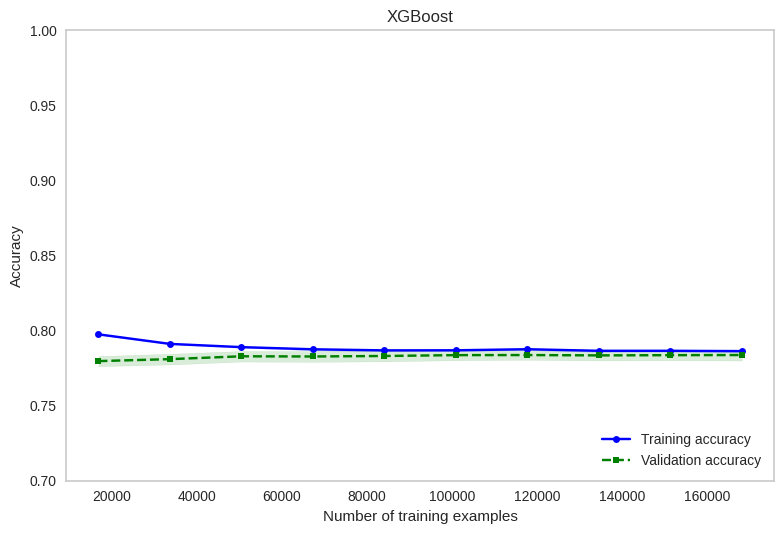

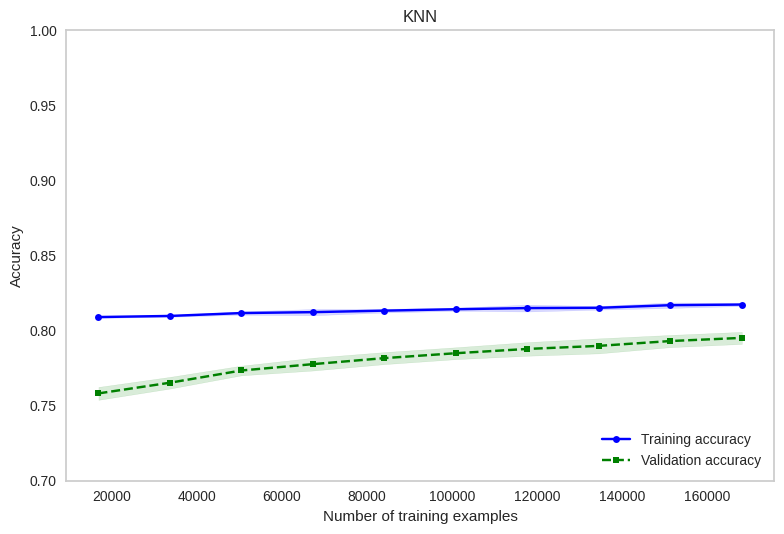

In [61]:
# 학습 곡선 그리기
plot_learning_curve(rf_model, X_train_scaled, y_train, model_name_list[0])
plot_learning_curve(et_model, X_train_scaled, y_train, model_name_list[1])
plot_learning_curve(dt_model, X_train_scaled, y_train, model_name_list[2])
plot_learning_curve(xgb_model, X_train_scaled, y_train, model_name_list[3])
plot_learning_curve(knn_model, X_train_scaled, y_train, model_name_list[4])

In [62]:
# 검증 곡선
from sklearn.model_selection import validation_curve

def plot_validation_curve(model, X, y, param_name, param_range, model_name, log_scale=False):
    train_scores, test_scores = validation_curve(model, X, y, param_name=param_name, param_range=param_range, cv=10, scoring="accuracy", n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.title(f'Validation Curve for {model_name}')
    plt.grid()
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    if log_scale:
        plt.xscale('log')
    plt.ylim([0.7, 1.0])
    plt.tight_layout()
    plt.show()


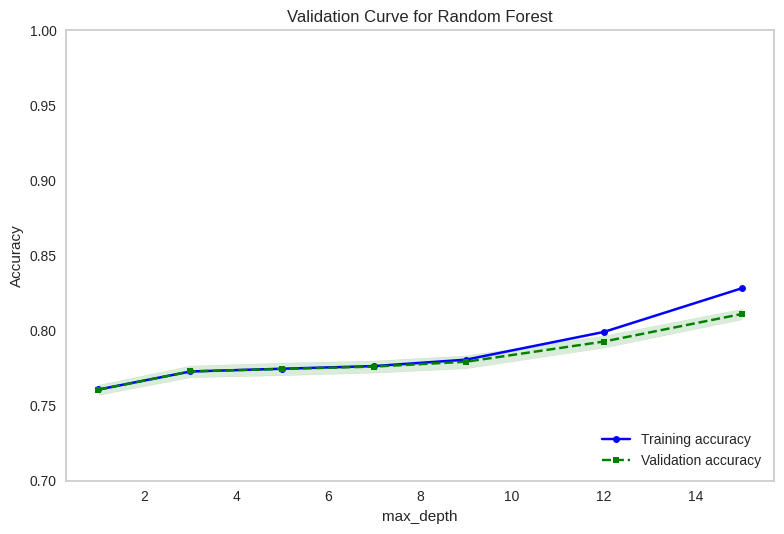

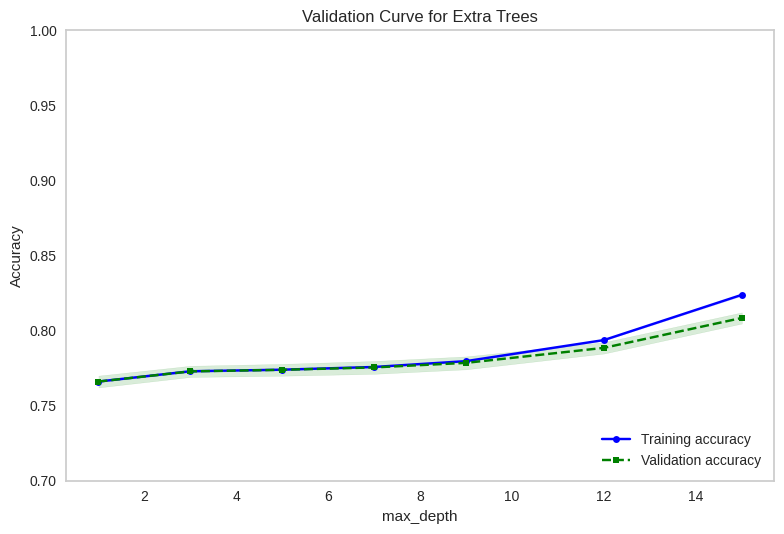

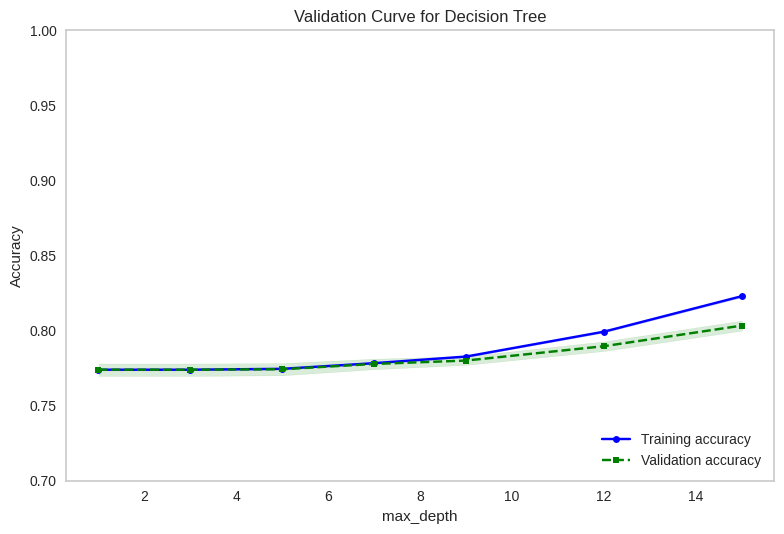

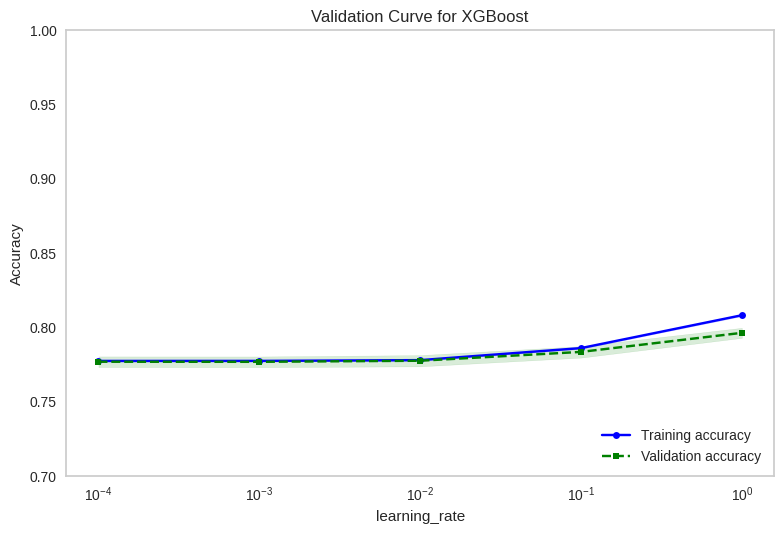

In [63]:
plot_validation_curve(rf_model, X_train_scaled, y_train, "max_depth", [1, 3, 5, 7, 9, 12, 15], model_name_list[0])
plot_validation_curve(et_model, X_train_scaled, y_train, "max_depth", [1, 3, 5, 7, 9, 12, 15], model_name_list[1])
plot_validation_curve(dt_model, X_train_scaled, y_train, "max_depth", [1, 3, 5, 7, 9, 12, 15], model_name_list[2])
plot_validation_curve(xgb_model, X_train_scaled, y_train, "learning_rate", [0.0001, 0.001, 0.01, 0.1, 1], model_name_list[3], log_scale=True)

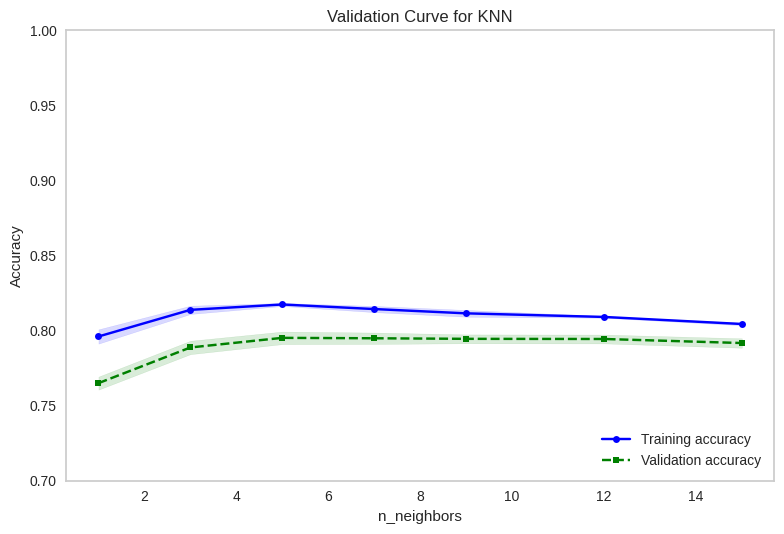

In [64]:
plot_validation_curve(knn_model, X_train_scaled, y_train, "n_neighbors", [1, 3, 5, 7, 9, 12, 15], model_name_list[4])

## 4.5. gridsearchCV

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [66]:
# Random Forest Classifier
# 하이퍼파라미터 그리드 정의
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV 객체 정의
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=10, n_jobs=-1, scoring='roc_auc')

# 모델 학습 및 최적 하이퍼파라미터 찾기
grid_search_rf.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터 출력
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Cross-validation Score: {grid_search_rf.best_score_}")


Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score: 0.9000170771907486


In [ ]:
# Extra Tree Classifier
# 하이퍼파라미터 그리드 정의
param_grid_et = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV 객체 정의
grid_search_et = GridSearchCV(estimator=et_model, param_grid=param_grid_et, cv=10, n_jobs=-1, scoring='roc_auc')

# 모델 학습 및 최적 하이퍼파라미터 찾기
grid_search_et.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터 출력
print(f"Best Parameters for Extra Trees: {grid_search_et.best_params_}")
print(f"Best Cross-validation Score for Extra Trees: {grid_search_et.best_score_}")


In [ ]:
# Decision Tree Classifier
# 하이퍼파라미터 그리드 정의
param_grid_dt = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV 객체 정의
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=10, n_jobs=-1, scoring='roc_auc')

# 모델 학습 및 최적 하이퍼파라미터 찾기
grid_search_dt.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터 출력
print(f"Best Parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best Cross-validation Score for Decision Tree: {grid_search_dt.best_score_}")


In [69]:
# Extreme Gradient Boost Classifier
# 하이퍼파라미터 그리드 정의
param_grid_xgb = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 10, 15],
    'learning_rate': [0.01, 0.1, 1, 10],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# GridSearchCV 객체 정의
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=10, n_jobs=-1, scoring='roc_auc')

# 모델 학습 및 최적 하이퍼파라미터 찾기
grid_search_xgb.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터 출력
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best Cross-validation Score for XGBoost: {grid_search_xgb.best_score_}")


Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200}
Best Cross-validation Score for XGBoost: 0.8979986334585082


In [70]:
# K-Neighbors Classifier
# 하이퍼파라미터 그리드 정의
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 10, 15, 20, 39],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV 객체 정의
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=10, n_jobs=-1, scoring='roc_auc')

# 모델 학습 및 최적 하이퍼파라미터 찾기
grid_search_knn.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터 출력
print(f"Best Parameters for KNN: {grid_search_knn.best_params_}")
print(f"Best Cross-validation Score for KNN: {grid_search_knn.best_score_}")


Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 39, 'weights': 'distance'}
Best Cross-validation Score for KNN: 0.8895467720052673


# 5. Re-fit Model (apply best params) (필수)

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
# Random Forest Classifier 최적의 하이퍼파라미터
best_params_rf = {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

# 기존 모델의 파라미터를 업데이트
rf_model.set_params(**best_params_rf)

# 10-fold 교차 검증을 통한 성능 평가
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=10, n_jobs=1, scoring='roc_auc')
print(f"Mean 10-Fold Cross-validation accuracy: {cv_scores_rf.mean():.4f}")

# 모델 재학습
rf_model.fit(X_train_scaled, y_train)

# 테스트 데이터에 대한 예측 확률 및 클래스 계산
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
y_pred_rf = rf_model.predict(X_test_scaled)

# 성능 평가 (AUC, Accuracy, Recall, Precision)
test_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
test_recall_rf = recall_score(y_test, y_pred_rf)
test_precision_rf = precision_score(y_test, y_pred_rf)

print(f"RF Test AUC: {test_auc_rf:.4f}")
print(f"RF Test Accuracy: {test_accuracy_rf:.4f}")
print(f"RF Test Recall: {test_recall_rf:.4f}")
print(f"RF Test Precision: {test_precision_rf:.4f}")

Mean 10-Fold Cross-validation accuracy: 0.9000
RF Test AUC: 0.8980
RF Test Accuracy: 0.8208
RF Test Recall: 0.8044
RF Test Precision: 0.8317


In [73]:
# Extra Tree Classifier 최적의 하이퍼파라미터
best_params_et = {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

# 기존 모델의 파라미터를 업데이트
et_model.set_params(**best_params_et)

# 10-fold 교차 검증을 통한 성능 평가
cv_scores_et = cross_val_score(et_model, X_train_scaled, y_train, cv=10, n_jobs=1, scoring='roc_auc')
print(f"Mean 10-Fold Cross-validation accuracy: {cv_scores_et.mean():.4f}")

# 모델 재학습
et_model.fit(X_train_scaled, y_train)

# 테스트 데이터에 대한 예측 확률 및 클래스 계산
y_pred_proba_et = et_model.predict_proba(X_test_scaled)[:, 1]
y_pred_et = et_model.predict(X_test_scaled)

# 성능 평가 (AUC, Accuracy, Recall, Precision)
test_auc_et = roc_auc_score(y_test, y_pred_proba_et)
test_accuracy_et = accuracy_score(y_test, y_pred_et)
test_recall_et = recall_score(y_test, y_pred_et)
test_precision_et = precision_score(y_test, y_pred_et)

print(f"ET Test AUC: {test_auc_et:.4f}")
print(f"ET Test Accuracy: {test_accuracy_et:.4f}")
print(f"ET Test Recall: {test_recall_et:.4f}")
print(f"ET Test Precision: {test_precision_et:.4f}")

Mean 10-Fold Cross-validation accuracy: 0.9008
ET Test AUC: 0.8990
ET Test Accuracy: 0.8219
ET Test Recall: 0.7993
ET Test Precision: 0.8371


In [74]:
best_params_dt = {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5}

dt_model.set_params(**best_params_dt)

cv_scores_dt = cross_val_score(dt_model, X_train_scaled, y_train, cv=10, n_jobs=1, scoring='roc_auc')
print(f"Mean 10-Fold Cross-validation accuracy: {cv_scores_dt.mean():.4f}")

dt_model.fit(X_train_scaled, y_train)

y_pred_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
y_pred_dt = dt_model.predict(X_test_scaled)

test_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
test_recall_dt = recall_score(y_test, y_pred_dt)
test_precision_dt = precision_score(y_test, y_pred_dt)

print(f"DT Test AUC: {test_auc_dt:.4f}")
print(f"DT Test Accuracy: {test_accuracy_dt:.4f}")
print(f"DT Test Recall: {test_recall_dt:.4f}")
print(f"DT Test Precision: {test_precision_dt:.4f}")


Mean 10-Fold Cross-validation accuracy: 0.8834
DT Test AUC: 0.8816
DT Test Accuracy: 0.8118
DT Test Recall: 0.7933
DT Test Precision: 0.8238


In [75]:
best_params_xgb = {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 200}

xgb_model.set_params(**best_params_xgb)

cv_scores_xgb = cross_val_score(xgb_model, X_train_scaled, y_train, cv=10, n_jobs=1, scoring='roc_auc')
print(f"Mean 10-Fold Cross-validation accuracy: {cv_scores_xgb.mean():.4f}")

xgb_model.fit(X_train_scaled, y_train)

y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
y_pred_xgb = xgb_model.predict(X_test_scaled)

test_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
test_recall_xgb = recall_score(y_test, y_pred_xgb)
test_precision_xgb = precision_score(y_test, y_pred_xgb)

print(f"XGB Test AUC: {test_auc_xgb:.4f}")
print(f"XGB Test Accuracy: {test_accuracy_xgb:.4f}")
print(f"XGB Test Recall: {test_recall_xgb:.4f}")
print(f"XGB Test Precision: {test_precision_xgb:.4f}")

Mean 10-Fold Cross-validation accuracy: 0.8984
XGB Test AUC: 0.8974
XGB Test Accuracy: 0.8224
XGB Test Recall: 0.8068
XGB Test Precision: 0.8328


In [76]:
# best_params_knn = {'metric': 'manhattan', 'n_neighbors': 39, 'weights': 'distance' (metric_params=None) }

best_params_knn = {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance', 'algorithm':'auto', 'leaf_size': 30, 'p': 2}

xgb_model.set_params(**best_params_knn)

cv_scores_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=10, n_jobs=1, scoring='roc_auc')
print(f"Mean 10-Fold Cross-validation accuracy: {cv_scores_knn.mean():.4f}")

knn_model.fit(X_train_scaled, y_train)

y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
y_pred_knn = knn_model.predict(X_test_scaled)

test_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
test_recall_knn = recall_score(y_test, y_pred_knn)
test_precision_knn = precision_score(y_test, y_pred_knn)

print(f"KNN Test AUC: {test_auc_knn:.4f}")
print(f"KNN Test Accuracy: {test_accuracy_knn:.4f}")
print(f"KNN Test Recall: {test_recall_knn:.4f}")
print(f"KNN Test Precision: {test_precision_knn:.4f}")

Mean 10-Fold Cross-validation accuracy: 0.8581
KNN Test AUC: 0.8552
KNN Test Accuracy: 0.7929
KNN Test Recall: 0.8009
KNN Test Precision: 0.7883


In [77]:
model_name_list = ["Random Forest", "Extra Trees", "Decision Tree", "XGBoost", "KNN"]

In [78]:
final_models = [rf_model, et_model, dt_model, xgb_model, knn_model]

# 6. Test

## 6.1. overall test score

In [79]:
# AUC Accuracy Recall Precision Fi score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

def calc_scores(model_name, y_pred, y_pred_proba, y_true):
    averagee = 'macro'
    test_auc = roc_auc_score(y_true, y_pred_proba)
    test_accuracy = accuracy_score(y_true, y_pred)
    test_recall = recall_score(y_true, y_pred, average=averagee)
    test_precision = precision_score(y_true, y_pred, average=averagee)
    test_f1 = f1_score(y_true, y_pred, average=averagee)

    print(model_name)
    print(f"{model_name} Test AUC: {test_auc:.4f}")
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
    print(f"{model_name} Test Recall: {test_recall:.4f}")
    print(f"{model_name} Test Precision: {test_precision:.4f}")
    print(f"{model_name} Test F1 Score: {test_f1:.4f}")
    print()

In [80]:
# 모델과 예측 확률 정의
y_preds_proba = [y_pred_proba_rf, y_pred_proba_et, y_pred_proba_dt, y_pred_proba_xgb, y_pred_proba_knn]
y_preds = [y_pred_rf, y_pred_et, y_pred_dt, y_pred_xgb, y_pred_knn]
model_names = ["Random Forest", "Extra Trees", "Decision Tree", "XGBoost", "KNN"]

# 성능 평가
for model_name, y_pred, y_pred_proba in zip(model_names, y_preds, y_preds_proba):
    calc_scores(model_name, y_pred, y_pred_proba, y_test)

Random Forest
Random Forest Test AUC: 0.8980
Random Forest Test Accuracy: 0.8208
Random Forest Test Recall: 0.8208
Random Forest Test Precision: 0.8212
Random Forest Test F1 Score: 0.8208

Extra Trees
Extra Trees Test AUC: 0.8990
Extra Trees Test Accuracy: 0.8219
Extra Trees Test Recall: 0.8219
Extra Trees Test Precision: 0.8225
Extra Trees Test F1 Score: 0.8218

Decision Tree
Decision Tree Test AUC: 0.8816
Decision Tree Test Accuracy: 0.8118
Decision Tree Test Recall: 0.8118
Decision Tree Test Precision: 0.8122
Decision Tree Test F1 Score: 0.8117

XGBoost
XGBoost Test AUC: 0.8974
XGBoost Test Accuracy: 0.8224
XGBoost Test Recall: 0.8224
XGBoost Test Precision: 0.8227
XGBoost Test F1 Score: 0.8224

KNN
KNN Test AUC: 0.8552
KNN Test Accuracy: 0.7929
KNN Test Recall: 0.7929
KNN Test Precision: 0.7930
KNN Test F1 Score: 0.7929



## 6.2. AUC curve

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from numpy import interp
import numpy as np

def plot_roc(model, X, y, model_name):
    cv = StratifiedKFold(n_splits=3)
    fig = plt.figure(figsize=(7, 5))

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)

    for i, (train_index, test_index) in enumerate(cv.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        probas = model.fit(X_train, y_train).predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, probas[:, 1], pos_label=1)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'ROC fold {i+1} (area = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Random guessing')

    mean_tpr /= cv.get_n_splits()
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, 'k--', label=f'Mean ROC (area = {mean_auc:.3f})', lw=2)
    plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect performance')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


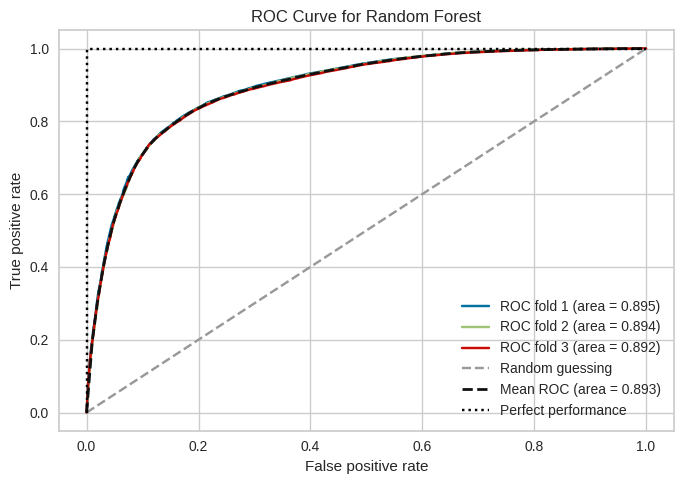

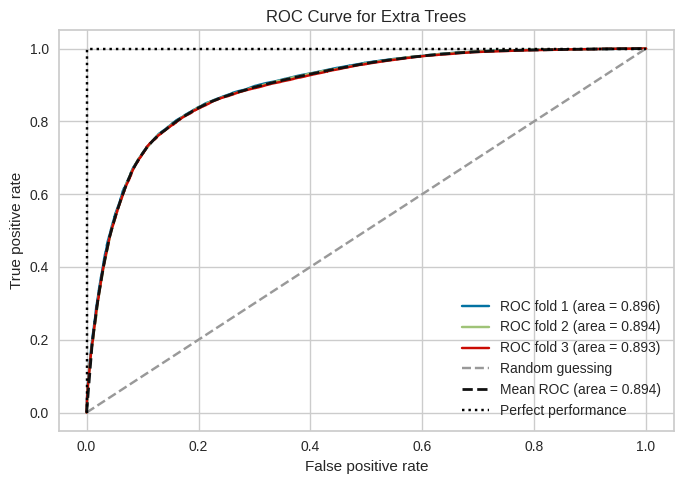

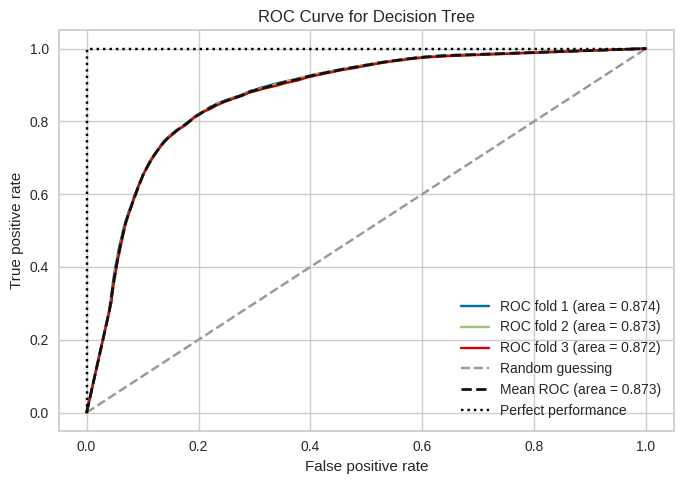

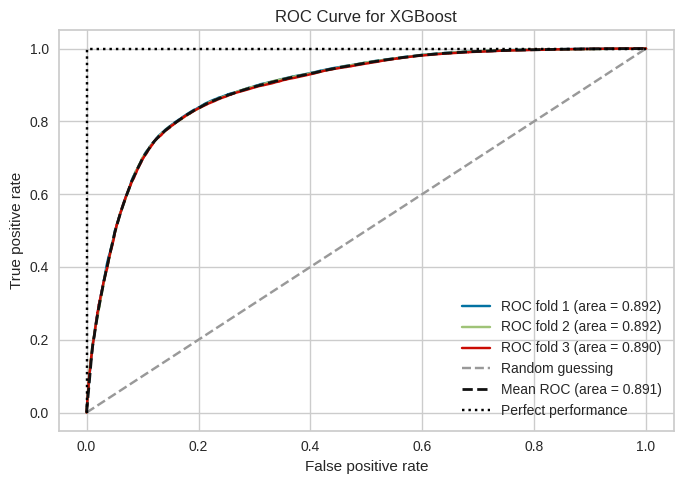

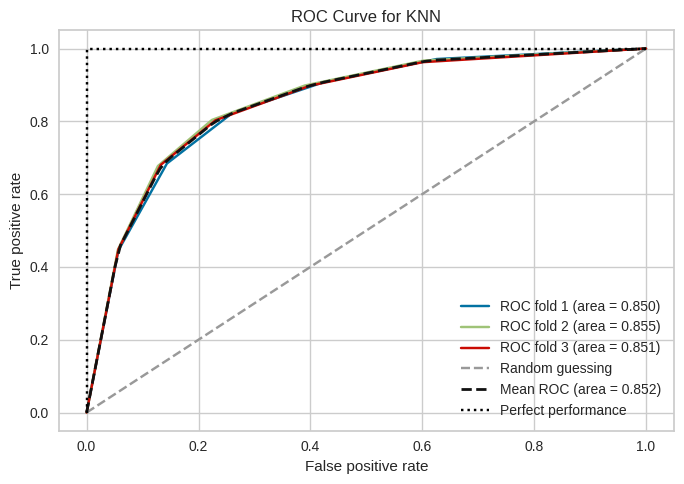

In [82]:
# 모델과 예측 확률 정의
final_models = [rf_model, et_model, dt_model, xgb_model, knn_model]
model_names = ["Random Forest", "Extra Trees", "Decision Tree", "XGBoost", "KNN"]

# Numpy 배열로 변환 (Pandas DataFrame에서 사용 중이라면)
X_train_np = X_train_scaled.to_numpy() if not isinstance(X_train_scaled, np.ndarray) else X_train_scaled
y_train_np = y_train.to_numpy() if not isinstance(y_train, np.ndarray) else y_train

# 개별 ROC Curve 그리기
for model, model_name in zip(final_models, model_names):
    plot_roc(model, X_train_np, y_train_np, model_name)

## 6.3. confusion matrix

In [83]:
# 오차 행렬
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_train_model, X_test_model, model_name):
  model.fit(X_train_model, y_train)
  y_prediction = model.predict(X_test_model)
  confmat = confusion_matrix(y_true=y_test, y_pred=y_prediction)

  fig, ax = plt.subplots(figsize=(2.5, 2.5))
  ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
      ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
  plt.title(model_name)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.tight_layout()
  plt.show()
  return y_prediction

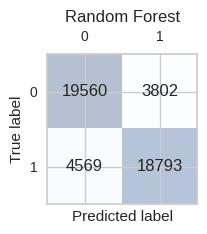

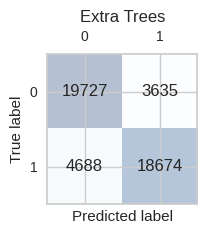

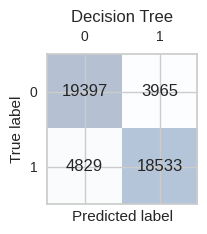

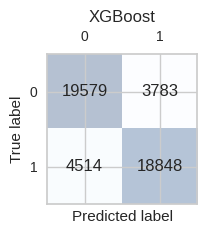

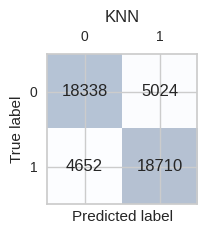

In [84]:
y_pred_r = plot_confusion_matrix(final_models[0], X_train_scaled, X_test_scaled, model_name_list[0])
y_pred_e = plot_confusion_matrix(final_models[1], X_train_scaled, X_test_scaled, model_name_list[1])
y_pred_d = plot_confusion_matrix(final_models[2], X_train_scaled, X_test_scaled, model_name_list[2])
y_pred_x = plot_confusion_matrix(final_models[3], X_train_scaled, X_test_scaled, model_name_list[3])
y_pred_k = plot_confusion_matrix(final_models[4], X_train_scaled, X_test_scaled, model_name_list[4])

## 6.4. feature importance

In [85]:
from sklearn.inspection import permutation_importance

# 피처 중요도 추출 함수 정의
def feature_importance_analysis(model, model_name, feature_names):
    # 모델 피처 중요도
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        importances_series = pd.Series(importances, index=feature_names)

        # 피처 중요도 시각화
        plt.figure(figsize=(8, 6))
        importances_series.sort_values(ascending=True).plot(kind='barh', color='lightblue')
        plt.title(f'Feature Importances by {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print(f"{model_name} does not support feature importances")

# 피처 이름 리스트
feature_names = X.columns

Analyzing Random Forest


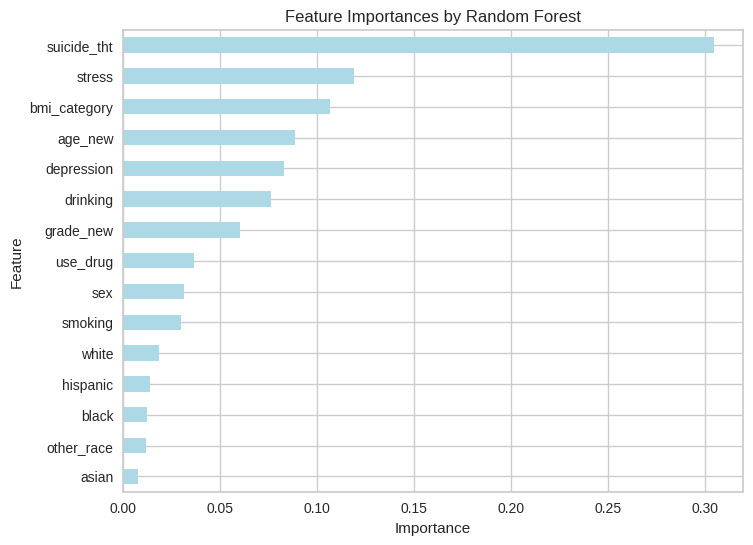

Analyzing Extra Trees


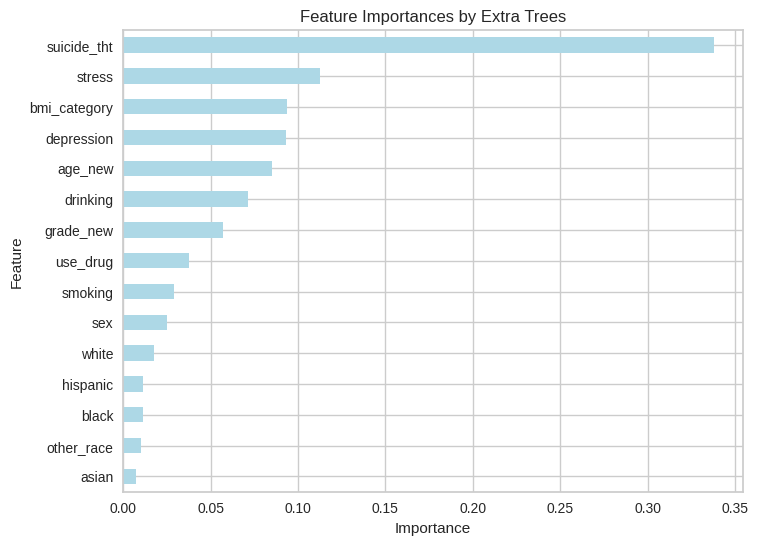

Analyzing Decision Tree


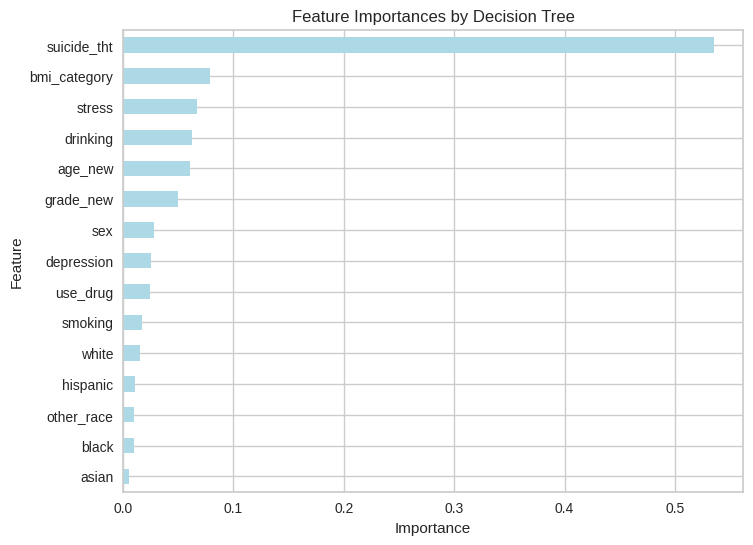

Analyzing XGBoost


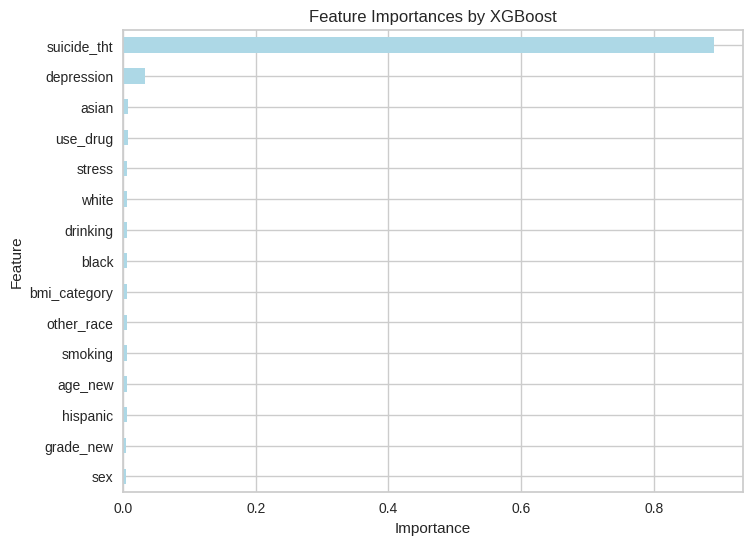

Analyzing KNN
KNN does not support feature importances


In [86]:
# 각 모델에 대해 피처 중요도 분석 수행

# 각 모델에 대해 피처 중요도 분석 수행
print("Analyzing Random Forest")
feature_importance_analysis(rf_model, "Random Forest", feature_names)

print("Analyzing Extra Trees")
feature_importance_analysis(et_model, "Extra Trees", feature_names)

print("Analyzing Decision Tree")
feature_importance_analysis(dt_model, "Decision Tree", feature_names)

print("Analyzing XGBoost")
feature_importance_analysis(xgb_model, "XGBoost", feature_names)

print("Analyzing KNN")
feature_importance_analysis(knn_model, "KNN", feature_names)


# 7. Final Model (마지막!!)

## 7.1. Extra trees

In [87]:
# 최종 모델 선정
final_model = final_models[1]

final_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=20, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=200, n_jobs=-1,
                     oob_score=False, random_state=7563, verbose=0,
                     warm_start=False)

## 7.2. save model

In [88]:
import pickle
import os

dest = os.path.join(OUT_PATH, 'final_model')
if not os.path.exists(dest):
    os.makedirs(dest)

pickle.dump(final_model, open(os.path.join(dest, 'model.pkl'), 'wb'), protocol=4)